In [1]:
import os
import cv2
import numpy as np
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, Dataset

D:\Users\Alex\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import torchvision

import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [3]:
from functions_v2 import(import_train_folder_dataset_2, 
                      Data_2, 
                      plot_loss_accuracy, 
                      accuracy_given_set,
                      import_test_folder_dataset_2,
                      Data_test_2,
                      make_predictions,
                      save_predictions_as_csv,
                      save_model,
                      save_metrics)

# 1. Build your own convolutional neural network using pytorch

In [4]:
# Learning parameters.
epochs = 500 # Number of epochs to train the model
lr = 0.01 # Learning rate. 0.01
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)


TRAIN_BATCH_SIZE = 16
TEST_BATCH_SIZE = 8

checkpoints_save = 100 # Save after 100 epochs


model_checkpoints = "D:/Personal/Alex/Uni/MS IA/2 Curso/Fall 2022/Computer Vision/Project/Project 1/CheckPoints/"

cuda


In [5]:
#PyTorch - Building the Model
class ClassificationNet(nn.Module):
    def __init__(self):
        super(ClassificationNet, self).__init__()
        
        '''
        In dimension:              224 * 224 * 3 
        Out dimension Conv:        224 * 224 * 32
        Out dimension MaxPooling:  112 * 112 * 32
        '''
        self.cnn1_model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=9, stride=1, padding=4),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        )
        
        self.cnn1_Res = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=1, stride=1, padding=0) 
        self.batch1 = nn.BatchNorm2d(32)
        self.maxpool1 = nn.MaxPool2d(2, stride=2)
        
        
        '''
        In dimension:              112 * 112 * 32
        Out dimension Conv:        112 * 112 * 64
        Out dimension MaxPooling:  56  * 56  * 64
        '''
        self.cnn2_model = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=9, stride=1, padding=4),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        )
        self.cnn2_Res = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=1, stride=1, padding=0) 
        self.batch2 = nn.BatchNorm2d(64)
        self.maxpool2 = nn.MaxPool2d(2, stride=2)
        
        '''
        In dimension:              56  * 56  * 64
        Out dimension Conv:        56  * 56  * 128
        Out dimension MaxPooling:  28  * 28  * 128
        '''
        self.cnn3_model = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        )
        self.cnn3_Res = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=1, stride=1, padding=0) 
        self.batch3 = nn.BatchNorm2d(128)
        self.maxpool3 = nn.MaxPool2d(2, stride=2)
        
        '''
        In dimension:              28  * 28  * 128
        Out dimension Conv:        28  * 28  * 256
        Out dimension MaxPooling:  14  * 14  * 256
        '''
        self.cnn4_model = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
        )
        self.cnn4_Res = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=1, stride=1, padding=0) 
        self.batch4 = nn.BatchNorm2d(256)
        self.maxpool4 = nn.MaxPool2d(2, stride=2)
        
        '''
        In dimension:              14  * 14  * 256
        Out dimension Conv:        14  * 14  * 512
        Out dimension MaxPooling:  7  * 7  * 512
        '''
        self.cnn5_model = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        )
        self.cnn5_Res = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=1, stride=1, padding=0) 
        self.batch5 = nn.BatchNorm2d(512)
        self.maxpool5 = nn.MaxPool2d(2, stride=2)
        
        '''
        In dimension:              7  * 7  * 512
        Out dimension Conv:        7  * 7  * 512
        Out dimension MaxPooling:  3 * 3  * 512
        '''
        self.cnn6_model = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        )
        self.cnn6_Res = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=1, stride=1, padding=0) 
        self.batch6 = nn.BatchNorm2d(512)
        self.maxpool6 = nn.MaxPool2d(3, stride=2)
        
        
        self.ffnn_model = nn.Sequential(
            nn.Linear(in_features=4608, out_features=512),
            nn.Dropout(0.4),
            nn.ReLU(),
            nn.Linear(in_features=512, out_features=4)
        )
        
        
        
    def forward(self, x): 
        
        residual = x
        # Convolution
        x = self.cnn1_model(x)
        # Residual
        residual = self.cnn1_Res(residual)
        x += residual
        x = self.batch1(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool1(x)
        
        
        residual = x
        # Convolution
        x = self.cnn2_model(x)
        # Residual
        residual = self.cnn2_Res(residual)
        x += residual
        x = self.batch2(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool2(x)
        
        
        residual = x
        # Convolution
        x = self.cnn3_model(x)
        # Residual
        residual = self.cnn3_Res(residual)
        x += residual
        x = self.batch3(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool3(x)
        
        
        residual = x
        # Convolution
        x = self.cnn4_model(x)
        # Residual
        residual = self.cnn4_Res(residual)
        x += residual
        x = self.batch4(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool4(x)
        
        
        residual = x
        # Convolution
        x = self.cnn5_model(x)
        # Residual
        residual = self.cnn5_Res(residual)
        x += residual
        x = self.batch5(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool5(x)
        
        
        residual = x
        # Convolution
        x = self.cnn6_model(x)
        # Residual
        residual = self.cnn6_Res(residual)
        x += residual
        x = self.batch6(x)
        x = F.relu(x) 
        # Max pooling
        x = self.maxpool6(x)
        
        x = torch.flatten(x,start_dim=1)
        #print("Flatten Out: ",x.shape)
        x = self.ffnn_model(x)
        #print("ffnn out: ",x.shape)
        x = torch.sigmoid(x)
        #print("Sigmoid Out: ",x.shape)
        return x

In [6]:
#PyTorch - Visualizing the Model
modelpy = ClassificationNet().to(device) # Get the model, and if there is a GPU use it
print("model created")
# Loss function.
criterion = nn.CrossEntropyLoss() # Set the loss function to cross entropy loss
# Optimizer.
optim = torch.optim.SGD(modelpy.parameters(), lr=lr)# , momentum=0.9, weight_decay=1e-3
#optim = torch.optim.Adam(modelpy.parameters(), lr=lr, weight_decay=1e-1)# Set the Optimizer to Adam


# Check if checkpoint is available, if so, load it
epoch_check = 0
previous_time = 0
names = os.listdir(model_checkpoints)
for elem in names:
    if(elem=="model_ckpt.pth"):
        print("Loading save chackpoint")
        checkpoint = torch.load(model_checkpoints + "model_ckpt.pth")
        modelpy.load_state_dict(checkpoint['model_state_dict'])
        modelpy.to(device)
        optim.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch_check = checkpoint['epoch']
        criterion = checkpoint['loss']
        previous_time = checkpoint['time']
        print(f"Epoch of the checkpoint: {epoch_check}")


modelpy

model created


ClassificationNet(
  (cnn1_model): Sequential(
    (0): Conv2d(3, 32, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (cnn1_Res): Conv2d(3, 32, kernel_size=(1, 1), stride=(1, 1))
  (batch1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2_model): Sequential(
    (0): Conv2d(32, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (cnn2_Res): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
  (batch2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (m

In [7]:
# Model Parameters

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f"Model Parameters: {count_parameters(modelpy)}")

Model Parameters: 18547716


# Load Data

In [7]:
# Path of the files
train_data_path = "D:/Personal/Alex/Uni/MS IA/2 Curso/Fall 2022/Artificial Intelligence/Projects/Project 1/data/Train"
test_data_path = "D:/Personal/Alex/Uni/MS IA/2 Curso/Fall 2022/Artificial Intelligence/Projects/Project 1/data/Test"

In [8]:
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomRotation((-20,20)),
                                    transforms.Resize((275, 275)),
                                    #transforms.CenterCrop((224, 224)),
                                    transforms.RandomCrop((224, 224)),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

img_transform_val = transforms.Compose([transforms.ToPILImage(),
                                        transforms.Resize((224, 224)),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])



img_transform_2 = transforms.Compose([transforms.ToPILImage(),
                                    transforms.AutoAugment(),
                                    transforms.Resize((224, 224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])


In [9]:
# Import the data into a resized 224x224 images
size_of_resized_img = (224,224) 
train_data, train_labels = import_train_folder_dataset_2(train_data_path, resized_side=size_of_resized_img)
print("Dim of Data: ", train_data.shape)
print("Dim of Lables: ", train_labels.shape)

Dim of Data:  (1149, 224, 224, 3)
Dim of Lables:  (1149,)


In [10]:
# Split into Train, Validation
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.1, random_state=42)
print("Dim of Data: ", X_train.shape)
print("Dim of Lables: ", y_train.shape)
print("Dim of X_test: ", X_val.shape)
print("Dim of y_test: ", y_val.shape)

Dim of Data:  (1034, 224, 224, 3)
Dim of Lables:  (1034,)
Dim of X_test:  (115, 224, 224, 3)
Dim of y_test:  (115,)


In [11]:
# Create the dataset object
train_Dataset = Data_2(X_train, y_train, img_transform) # img_transform_2 img_transform
val_Dataset = Data_2(X_val, y_val, img_transform_val)

print("Train len: ",len(train_Dataset))
print("Val len: ",len(val_Dataset))

Train len:  1034
Val len:  115


In [12]:
# Create the dataloaders
train_loader = DataLoader(
    train_Dataset, 
    batch_size=TRAIN_BATCH_SIZE,             
    shuffle=True)

valid_loader = DataLoader(
    val_Dataset, 
    batch_size=TEST_BATCH_SIZE,
    shuffle=False
    )

In [13]:
print("Type of object: ",type(train_loader))

print()
print( 'Train Size: ' + str(len(train_loader)))
print( 'Validate Size: ' + str(len(valid_loader)))

print()
print("Content of one element: ",iter(train_loader).next())

print()
print("Type of one element: ", type(iter(train_loader).next()))
print("Length of one element: ", len(iter(train_loader).next()))

print()
print('Input tensors size: ' + str(iter(train_loader).next()[0].shape)) # Input: 16, 16875 | 16 train batch size, 16875 = 75x75 image dimension, 3 channels (colors) 
print('Label tensors size: ' + str(iter(train_loader).next()[1].shape)) # Label: 16 | 16 train Batch size


print()
print('Input tensors size: ' + str(iter(valid_loader).next()[0].shape)) # Input: 8, 16875 | 8 validation batch size, 16875 = 75x75 image dimension, 3 channels (colors) 
print('Label tensors size: ' + str(iter(valid_loader).next()[1].shape)) # Label: 8 | 8 validation Batch size


Type of object:  <class 'torch.utils.data.dataloader.DataLoader'>

Train Size: 65
Validate Size: 15

Content of one element:  [tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-1.0733, -1.1247, -1.1760,  ..., -0.5938, -0.5424, -0.5424],
          [-1.0562, -1.0904, -1.1075,  ..., -0.5253, -0.5082, -0.5082],
          [-1.0219, -1.0562, -1.0904,  ..., -0.4739, -0.4568, -0.4911]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-0.6702, -0.7227, -0.7752,  ..., -0.0224, -0.0049, -0.0224],
          [-0.6527, -0.6877, -0.7052,  ...,  0.0301,  0.0476,  0.0301],
          [-0.6176, -0.6527, -0.6877,  ...,  0.08

# 2. Train your model using cow teat datasets (you may need to use  Google Colab (or Kaggle) with GPU to train your code) 


Epoch 1 of 500


100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


train loss:  0.07371975951314665
Val loss:  0.14680707091870515
train accuracy:  0.5241779497098646
Val accuracy:  0.5826086956521739
Current time: 2.367 minutes. Time expected till completion: 1181.067 minutes

Epoch 2 of 500


100%|██████████| 15/15 [00:02<00:00,  5.85it/s]


train loss:  0.07003399429976133
Val loss:  0.14450898740602577
train accuracy:  0.5686653771760155
Val accuracy:  0.5826086956521739
Current time: 3.273 minutes. Time expected till completion: 815.005 minutes

Epoch 3 of 500


100%|██████████| 15/15 [00:02<00:00,  5.61it/s]


train loss:  0.06920425083697188
Val loss:  0.14294908668683923
train accuracy:  0.6063829787234043
Val accuracy:  0.6434782608695652
Current time: 4.197 minutes. Time expected till completion: 695.344 minutes

Epoch 4 of 500


100%|██████████| 15/15 [00:02<00:00,  5.84it/s]


train loss:  0.06886331941680245
Val loss:  0.14151028031888216
train accuracy:  0.6150870406189555
Val accuracy:  0.6347826086956522
Current time: 5.124 minutes. Time expected till completion: 635.340 minutes

Epoch 5 of 500


100%|██████████| 15/15 [00:02<00:00,  5.80it/s]


train loss:  0.06879205843235583
Val loss:  0.1414530899213708
train accuracy:  0.6112185686653772
Val accuracy:  0.6347826086956522
Current time: 6.050 minutes. Time expected till completion: 598.910 minutes

Epoch 6 of 500


100%|██████████| 15/15 [00:02<00:00,  5.85it/s]


train loss:  0.06777974957423699
Val loss:  0.1404146961543871
train accuracy:  0.6150870406189555
Val accuracy:  0.6347826086956522
Current time: 6.967 minutes. Time expected till completion: 573.613 minutes

Epoch 7 of 500


100%|██████████| 15/15 [00:02<00:00,  5.64it/s]


train loss:  0.0680327220627141
Val loss:  0.14190398506496263
train accuracy:  0.6160541586073501
Val accuracy:  0.6521739130434783
Current time: 7.903 minutes. Time expected till completion: 556.589 minutes

Epoch 8 of 500


100%|██████████| 15/15 [00:02<00:00,  5.78it/s]


train loss:  0.06760077556051185
Val loss:  0.14050055794093919
train accuracy:  0.6131528046421664
Val accuracy:  0.6608695652173913
Current time: 8.825 minutes. Time expected till completion: 542.713 minutes

Epoch 9 of 500


100%|██████████| 15/15 [00:02<00:00,  5.54it/s]


train loss:  0.06754360963343652
Val loss:  0.14061293083688486
train accuracy:  0.6247582205029013
Val accuracy:  0.6434782608695652
Current time: 9.757 minutes. Time expected till completion: 532.323 minutes

Epoch 10 of 500


100%|██████████| 15/15 [00:02<00:00,  5.69it/s]


train loss:  0.06751094588458653
Val loss:  0.1388484063355819
train accuracy:  0.6160541586073501
Val accuracy:  0.6608695652173913
Current time: 10.682 minutes. Time expected till completion: 523.436 minutes

Epoch 11 of 500


100%|██████████| 15/15 [00:02<00:00,  5.70it/s]


train loss:  0.06720172724825271
Val loss:  0.13969518568204797
train accuracy:  0.6286266924564797
Val accuracy:  0.6608695652173913
Current time: 11.608 minutes. Time expected till completion: 516.021 minutes

Epoch 12 of 500


100%|██████████| 15/15 [00:02<00:00,  5.80it/s]


train loss:  0.06697231848189171
Val loss:  0.13933014714199563
train accuracy:  0.625725338491296
Val accuracy:  0.6434782608695652
Current time: 12.524 minutes. Time expected till completion: 509.329 minutes

Epoch 13 of 500


100%|██████████| 15/15 [00:02<00:00,  5.77it/s]


train loss:  0.06662726246641959
Val loss:  0.1386545585549396
train accuracy:  0.6170212765957447
Val accuracy:  0.6521739130434783
Current time: 13.449 minutes. Time expected till completion: 503.829 minutes

Epoch 14 of 500


100%|██████████| 15/15 [00:02<00:00,  5.64it/s]


train loss:  0.06704157769564734
Val loss:  0.13869999698970628
train accuracy:  0.6179883945841392
Val accuracy:  0.6608695652173913
Current time: 14.387 minutes. Time expected till completion: 499.433 minutes

Epoch 15 of 500


100%|██████████| 15/15 [00:02<00:00,  5.61it/s]


train loss:  0.0666500140320171
Val loss:  0.1392415419868801
train accuracy:  0.6131528046421664
Val accuracy:  0.6608695652173913
Current time: 15.341 minutes. Time expected till completion: 496.016 minutes

Epoch 16 of 500


100%|██████████| 15/15 [00:02<00:00,  5.77it/s]


train loss:  0.06674040309234561
Val loss:  0.1398975159810937
train accuracy:  0.6131528046421664
Val accuracy:  0.6608695652173913
Current time: 16.283 minutes. Time expected till completion: 492.560 minutes

Epoch 17 of 500


100%|██████████| 15/15 [00:02<00:00,  5.46it/s]


train loss:  0.06649892375132563
Val loss:  0.1384912423465563
train accuracy:  0.6247582205029013
Val accuracy:  0.6521739130434783
Current time: 17.235 minutes. Time expected till completion: 489.688 minutes

Epoch 18 of 500


100%|██████████| 15/15 [00:03<00:00,  4.29it/s]


train loss:  0.06643007329630898
Val loss:  0.13899075311163198
train accuracy:  0.6179883945841392
Val accuracy:  0.6608695652173913
Current time: 18.188 minutes. Time expected till completion: 487.022 minutes

Epoch 19 of 500


100%|██████████| 15/15 [00:02<00:00,  5.53it/s]


train loss:  0.06596052946389529
Val loss:  0.13972971750342328
train accuracy:  0.6228239845261122
Val accuracy:  0.6608695652173913
Current time: 19.148 minutes. Time expected till completion: 484.748 minutes

Epoch 20 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.06646866090523666
Val loss:  0.13819945584172788
train accuracy:  0.6228239845261122
Val accuracy:  0.6608695652173913
Current time: 19.998 minutes. Time expected till completion: 479.961 minutes

Epoch 21 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.06579464068726368
Val loss:  0.13784801182539566
train accuracy:  0.6237911025145068
Val accuracy:  0.6608695652173913
Current time: 20.777 minutes. Time expected till completion: 473.924 minutes

Epoch 22 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.06629743584120067
Val loss:  0.1376798038897307
train accuracy:  0.6083172147001934
Val accuracy:  0.6521739130434783
Current time: 21.547 minutes. Time expected till completion: 468.164 minutes

Epoch 23 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.06598692469486185
Val loss:  0.13713483343953672
train accuracy:  0.6237911025145068
Val accuracy:  0.6521739130434783
Current time: 22.318 minutes. Time expected till completion: 462.849 minutes

Epoch 24 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.0660838668074322
Val loss:  0.13646249149156653
train accuracy:  0.6218568665377177
Val accuracy:  0.6695652173913044
Current time: 23.086 minutes. Time expected till completion: 457.865 minutes

Epoch 25 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.06602100915558333
Val loss:  0.1362495463827382
train accuracy:  0.6276595744680851
Val accuracy:  0.6608695652173913
Current time: 23.854 minutes. Time expected till completion: 453.230 minutes

Epoch 26 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.06599236139937573
Val loss:  0.13541359745937845
train accuracy:  0.6199226305609284
Val accuracy:  0.6608695652173913
Current time: 24.621 minutes. Time expected till completion: 448.861 minutes

Epoch 27 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.06585224609771596
Val loss:  0.1350010192912558
train accuracy:  0.6334622823984526
Val accuracy:  0.6608695652173913
Current time: 25.388 minutes. Time expected till completion: 444.761 minutes

Epoch 28 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.0652504599071333
Val loss:  0.13692263934923254
train accuracy:  0.625725338491296
Val accuracy:  0.6608695652173913
Current time: 26.154 minutes. Time expected till completion: 440.880 minutes

Epoch 29 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.06577427936015323
Val loss:  0.13838045389755912
train accuracy:  0.6199226305609284
Val accuracy:  0.6521739130434783
Current time: 26.918 minutes. Time expected till completion: 437.185 minutes

Epoch 30 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.06551167415004634
Val loss:  0.13483477157095206
train accuracy:  0.6276595744680851
Val accuracy:  0.6608695652173913
Current time: 27.681 minutes. Time expected till completion: 433.676 minutes

Epoch 31 of 500


100%|██████████| 15/15 [00:02<00:00,  6.10it/s]


train loss:  0.0654044551360538
Val loss:  0.13512845972309942
train accuracy:  0.6305609284332688
Val accuracy:  0.6608695652173913
Current time: 28.446 minutes. Time expected till completion: 430.360 minutes

Epoch 32 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.06568893922827922
Val loss:  0.1352946374727332
train accuracy:  0.625725338491296
Val accuracy:  0.6608695652173913
Current time: 29.207 minutes. Time expected till completion: 427.158 minutes

Epoch 33 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.06550731447955857
Val loss:  0.13415952920913696
train accuracy:  0.6305609284332688
Val accuracy:  0.6608695652173913
Current time: 29.969 minutes. Time expected till completion: 424.102 minutes

Epoch 34 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06523724381651592
Val loss:  0.13805520327194878
train accuracy:  0.6266924564796905
Val accuracy:  0.6521739130434783
Current time: 30.733 minutes. Time expected till completion: 421.220 minutes

Epoch 35 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.06508674641181238
Val loss:  0.13686226554538894
train accuracy:  0.6353965183752418
Val accuracy:  0.6608695652173913
Current time: 31.493 minutes. Time expected till completion: 418.407 minutes

Epoch 36 of 500


100%|██████████| 15/15 [00:02<00:00,  6.27it/s]


train loss:  0.06560476230929391
Val loss:  0.13619588561680007
train accuracy:  0.6199226305609284
Val accuracy:  0.6608695652173913
Current time: 32.253 minutes. Time expected till completion: 415.706 minutes

Epoch 37 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06498250007859974
Val loss:  0.1347386878469716
train accuracy:  0.6344294003868471
Val accuracy:  0.6608695652173913
Current time: 33.014 minutes. Time expected till completion: 413.127 minutes

Epoch 38 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.06491533676936963
Val loss:  0.13551139261411585
train accuracy:  0.6353965183752418
Val accuracy:  0.6521739130434783
Current time: 33.772 minutes. Time expected till completion: 410.597 minutes

Epoch 39 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06480449974191027
Val loss:  0.13673085544420324
train accuracy:  0.6382978723404256
Val accuracy:  0.6521739130434783
Current time: 34.530 minutes. Time expected till completion: 408.159 minutes

Epoch 40 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.0648383320646083
Val loss:  0.1361995272014452
train accuracy:  0.6305609284332688
Val accuracy:  0.6695652173913044
Current time: 35.289 minutes. Time expected till completion: 405.818 minutes

Epoch 41 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.06488707056359119
Val loss:  0.13553754246753194
train accuracy:  0.6334622823984526
Val accuracy:  0.6695652173913044
Current time: 36.061 minutes. Time expected till completion: 403.712 minutes

Epoch 42 of 500


100%|██████████| 15/15 [00:02<00:00,  6.08it/s]


train loss:  0.06445917089395874
Val loss:  0.13611316991888958
train accuracy:  0.6344294003868471
Val accuracy:  0.6521739130434783
Current time: 36.834 minutes. Time expected till completion: 401.667 minutes

Epoch 43 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.06483028163301184
Val loss:  0.1373502492904663
train accuracy:  0.6353965183752418
Val accuracy:  0.6608695652173913
Current time: 37.605 minutes. Time expected till completion: 399.657 minutes

Epoch 44 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.06453447657812034
Val loss:  0.13956813138464222
train accuracy:  0.6421663442940039
Val accuracy:  0.6695652173913044
Current time: 38.371 minutes. Time expected till completion: 397.668 minutes

Epoch 45 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.06478862426958877
Val loss:  0.13688061340995458
train accuracy:  0.6431334622823984
Val accuracy:  0.6869565217391305
Current time: 39.136 minutes. Time expected till completion: 395.710 minutes

Epoch 46 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.06447131041170781
Val loss:  0.13469743521317193
train accuracy:  0.6402321083172147
Val accuracy:  0.6608695652173913
Current time: 39.900 minutes. Time expected till completion: 393.800 minutes

Epoch 47 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.06467248392750724
Val loss:  0.13547774760619455
train accuracy:  0.6373307543520309
Val accuracy:  0.6608695652173913
Current time: 40.667 minutes. Time expected till completion: 391.957 minutes

Epoch 48 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.06435646379017046
Val loss:  0.13460109078365823
train accuracy:  0.6450676982591876
Val accuracy:  0.6608695652173913
Current time: 41.432 minutes. Time expected till completion: 390.154 minutes

Epoch 49 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.06459799114924565
Val loss:  0.13387886078461356
train accuracy:  0.6450676982591876
Val accuracy:  0.6608695652173913
Current time: 42.200 minutes. Time expected till completion: 388.414 minutes

Epoch 50 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.06419244345198287
Val loss:  0.1336717102838599
train accuracy:  0.6479690522243714
Val accuracy:  0.6521739130434783
Current time: 42.964 minutes. Time expected till completion: 386.675 minutes

Epoch 51 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.06405176392376308
Val loss:  0.13501264893490336
train accuracy:  0.6441005802707931
Val accuracy:  0.6608695652173913
Current time: 43.727 minutes. Time expected till completion: 384.966 minutes

Epoch 52 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.06383324562926818
Val loss:  0.13672108598377394
train accuracy:  0.6363636363636364
Val accuracy:  0.6608695652173913
Current time: 44.489 minutes. Time expected till completion: 383.291 minutes

Epoch 53 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.06386566744321089
Val loss:  0.13418343326319818
train accuracy:  0.6411992263056093
Val accuracy:  0.6608695652173913
Current time: 45.251 minutes. Time expected till completion: 381.648 minutes

Epoch 54 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.06386140426999135
Val loss:  0.13789907227391782
train accuracy:  0.6479690522243714
Val accuracy:  0.6695652173913044
Current time: 46.012 minutes. Time expected till completion: 380.022 minutes

Epoch 55 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.06418862379727096
Val loss:  0.13465226422185483
train accuracy:  0.6421663442940039
Val accuracy:  0.6608695652173913
Current time: 46.773 minutes. Time expected till completion: 378.434 minutes

Epoch 56 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.06383975815726894
Val loss:  0.13481368033782296
train accuracy:  0.6441005802707931
Val accuracy:  0.6608695652173913
Current time: 47.533 minutes. Time expected till completion: 376.867 minutes

Epoch 57 of 500


100%|██████████| 15/15 [00:02<00:00,  6.24it/s]


train loss:  0.06379367673420122
Val loss:  0.13388024879538496
train accuracy:  0.6499032882011605
Val accuracy:  0.6521739130434783
Current time: 48.292 minutes. Time expected till completion: 375.323 minutes

Epoch 58 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06406995383175937
Val loss:  0.13732949598975805
train accuracy:  0.6479690522243714
Val accuracy:  0.6521739130434783
Current time: 49.052 minutes. Time expected till completion: 373.810 minutes

Epoch 59 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.06372058184050038
Val loss:  0.13708307432091754
train accuracy:  0.6499032882011605
Val accuracy:  0.6608695652173913
Current time: 49.811 minutes. Time expected till completion: 372.319 minutes

Epoch 60 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.06378831813828857
Val loss:  0.13513824006785516
train accuracy:  0.6392649903288201
Val accuracy:  0.6695652173913044
Current time: 50.571 minutes. Time expected till completion: 370.856 minutes

Epoch 61 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.06350157760098087
Val loss:  0.13612773936727773
train accuracy:  0.6576402321083172
Val accuracy:  0.6521739130434783
Current time: 51.332 minutes. Time expected till completion: 369.425 minutes

Epoch 62 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.06367950565118624
Val loss:  0.1372367490892825
train accuracy:  0.6528046421663443
Val accuracy:  0.6260869565217392
Current time: 52.098 minutes. Time expected till completion: 368.049 minutes

Epoch 63 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.0639266050069429
Val loss:  0.13737470585366954
train accuracy:  0.648936170212766
Val accuracy:  0.6521739130434783
Current time: 52.864 minutes. Time expected till completion: 366.692 minutes

Epoch 64 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.06367407874627547
Val loss:  0.13339637466098953
train accuracy:  0.6479690522243714
Val accuracy:  0.6869565217391305
Current time: 53.632 minutes. Time expected till completion: 365.367 minutes

Epoch 65 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.063484988141106
Val loss:  0.13841054491374805
train accuracy:  0.6615087040618955
Val accuracy:  0.6521739130434783
Current time: 54.399 minutes. Time expected till completion: 364.052 minutes

Epoch 66 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.0632330812729996
Val loss:  0.1355012033296668
train accuracy:  0.6537717601547389
Val accuracy:  0.6521739130434783
Current time: 55.166 minutes. Time expected till completion: 362.756 minutes

Epoch 67 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.06378721579822857
Val loss:  0.13615860109743866
train accuracy:  0.6586073500967118
Val accuracy:  0.6608695652173913
Current time: 55.929 minutes. Time expected till completion: 361.449 minutes

Epoch 68 of 500


100%|██████████| 15/15 [00:02<00:00,  6.06it/s]


train loss:  0.06323329986179359
Val loss:  0.13629139713619065
train accuracy:  0.6682785299806576
Val accuracy:  0.6869565217391305
Current time: 56.691 minutes. Time expected till completion: 360.157 minutes

Epoch 69 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.06342986669946224
Val loss:  0.13418360015620356
train accuracy:  0.6663442940038685
Val accuracy:  0.6782608695652174
Current time: 57.452 minutes. Time expected till completion: 358.870 minutes

Epoch 70 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.06323807146148018
Val loss:  0.13336286389309426
train accuracy:  0.660541586073501
Val accuracy:  0.6521739130434783
Current time: 58.215 minutes. Time expected till completion: 357.605 minutes

Epoch 71 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.06291464236303732
Val loss:  0.1345218855401744
train accuracy:  0.6566731141199227
Val accuracy:  0.6608695652173913
Current time: 58.975 minutes. Time expected till completion: 356.339 minutes

Epoch 72 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.06327922812282924
Val loss:  0.13494281768798827
train accuracy:  0.6518375241779497
Val accuracy:  0.6695652173913044
Current time: 59.733 minutes. Time expected till completion: 355.081 minutes

Epoch 73 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.0630913633327189
Val loss:  0.13742684281390646
train accuracy:  0.6653771760154739
Val accuracy:  0.6608695652173913
Current time: 60.494 minutes. Time expected till completion: 353.846 minutes

Epoch 74 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.06308328315644476
Val loss:  0.13727811937746795
train accuracy:  0.6547388781431335
Val accuracy:  0.6608695652173913
Current time: 61.258 minutes. Time expected till completion: 352.648 minutes

Epoch 75 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.06298285371099727
Val loss:  0.13809092148490573
train accuracy:  0.6634429400386848
Val accuracy:  0.6608695652173913
Current time: 62.024 minutes. Time expected till completion: 351.467 minutes

Epoch 76 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.06245045234202416
Val loss:  0.1344489424125008
train accuracy:  0.6789168278529981
Val accuracy:  0.6260869565217392
Current time: 62.787 minutes. Time expected till completion: 350.287 minutes

Epoch 77 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.06269320966657864
Val loss:  0.13542097547779913
train accuracy:  0.6750483558994197
Val accuracy:  0.6608695652173913
Current time: 63.551 minutes. Time expected till completion: 349.118 minutes

Epoch 78 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.06321739510595221
Val loss:  0.13664599760718968
train accuracy:  0.6789168278529981
Val accuracy:  0.6608695652173913
Current time: 64.313 minutes. Time expected till completion: 347.952 minutes

Epoch 79 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.0625596027424995
Val loss:  0.13356664543566496
train accuracy:  0.6769825918762089
Val accuracy:  0.6521739130434783
Current time: 65.074 minutes. Time expected till completion: 346.787 minutes

Epoch 80 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06254876870481835
Val loss:  0.13568784827771393
train accuracy:  0.683752417794971
Val accuracy:  0.6608695652173913
Current time: 65.835 minutes. Time expected till completion: 345.632 minutes

Epoch 81 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.06257116148965271
Val loss:  0.13706814361655195
train accuracy:  0.6702127659574468
Val accuracy:  0.6521739130434783
Current time: 66.597 minutes. Time expected till completion: 344.495 minutes

Epoch 82 of 500


100%|██████████| 15/15 [00:02<00:00,  6.10it/s]


train loss:  0.06246593116099876
Val loss:  0.1349569191103396
train accuracy:  0.6702127659574468
Val accuracy:  0.6434782608695652
Current time: 67.355 minutes. Time expected till completion: 343.347 minutes

Epoch 83 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.06257728918147502
Val loss:  0.13752526407656462
train accuracy:  0.6798839458413927
Val accuracy:  0.6782608695652174
Current time: 68.116 minutes. Time expected till completion: 342.222 minutes

Epoch 84 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.06281962673714821
Val loss:  0.13444557708242666
train accuracy:  0.6653771760154739
Val accuracy:  0.6782608695652174
Current time: 68.878 minutes. Time expected till completion: 341.110 minutes

Epoch 85 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.06209065812699338
Val loss:  0.13352907066759856
train accuracy:  0.6731141199226306
Val accuracy:  0.6434782608695652
Current time: 69.638 minutes. Time expected till completion: 339.996 minutes

Epoch 86 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.062289374363491565
Val loss:  0.138031528307044
train accuracy:  0.6818181818181818
Val accuracy:  0.6608695652173913
Current time: 70.399 minutes. Time expected till completion: 338.898 minutes

Epoch 87 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.06253194930013882
Val loss:  0.13409634673077128
train accuracy:  0.6827852998065764
Val accuracy:  0.6608695652173913
Current time: 71.164 minutes. Time expected till completion: 337.824 minutes

Epoch 88 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.06178665806753723
Val loss:  0.13884242306584899
train accuracy:  0.6818181818181818
Val accuracy:  0.6608695652173913
Current time: 71.929 minutes. Time expected till completion: 336.758 minutes

Epoch 89 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.06202137032145458
Val loss:  0.13623427048973416
train accuracy:  0.6760154738878144
Val accuracy:  0.6782608695652174
Current time: 72.694 minutes. Time expected till completion: 335.700 minutes

Epoch 90 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06264096515782797
Val loss:  0.13589655575544937
train accuracy:  0.6692456479690522
Val accuracy:  0.6347826086956522
Current time: 73.459 minutes. Time expected till completion: 334.647 minutes

Epoch 91 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.06268940644061312
Val loss:  0.13674542178278384
train accuracy:  0.6682785299806576
Val accuracy:  0.6608695652173913
Current time: 74.223 minutes. Time expected till completion: 333.596 minutes

Epoch 92 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.06247655600597596
Val loss:  0.13409814212633217
train accuracy:  0.6711798839458414
Val accuracy:  0.6434782608695652
Current time: 74.985 minutes. Time expected till completion: 332.543 minutes

Epoch 93 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.06211396198669301
Val loss:  0.13419549724330074
train accuracy:  0.690522243713733
Val accuracy:  0.6521739130434783
Current time: 75.750 minutes. Time expected till completion: 331.506 minutes

Epoch 94 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.06191531855548143
Val loss:  0.13432558930438498
train accuracy:  0.6711798839458414
Val accuracy:  0.6782608695652174
Current time: 76.510 minutes. Time expected till completion: 330.458 minutes

Epoch 95 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.061525153410503894
Val loss:  0.13514290322428163
train accuracy:  0.6818181818181818
Val accuracy:  0.6608695652173913
Current time: 77.272 minutes. Time expected till completion: 329.424 minutes

Epoch 96 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.06202511267459139
Val loss:  0.1333641554998315
train accuracy:  0.6847195357833655
Val accuracy:  0.591304347826087
Current time: 78.034 minutes. Time expected till completion: 328.393 minutes

Epoch 97 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.06189475011087709
Val loss:  0.13847344284472257
train accuracy:  0.6972920696324951
Val accuracy:  0.6434782608695652
Current time: 78.796 minutes. Time expected till completion: 327.367 minutes

Epoch 98 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.06245349880805098
Val loss:  0.1368078781210858
train accuracy:  0.6769825918762089
Val accuracy:  0.6521739130434783
Current time: 79.555 minutes. Time expected till completion: 326.337 minutes

Epoch 99 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.061501364066937445
Val loss:  0.14103224432986716
train accuracy:  0.6818181818181818
Val accuracy:  0.6
Current time: 80.315 minutes. Time expected till completion: 325.318 minutes

Epoch 100 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.061687441063572865
Val loss:  0.13355887661809507
train accuracy:  0.6779497098646035
Val accuracy:  0.6782608695652174
Saving model checkpoint


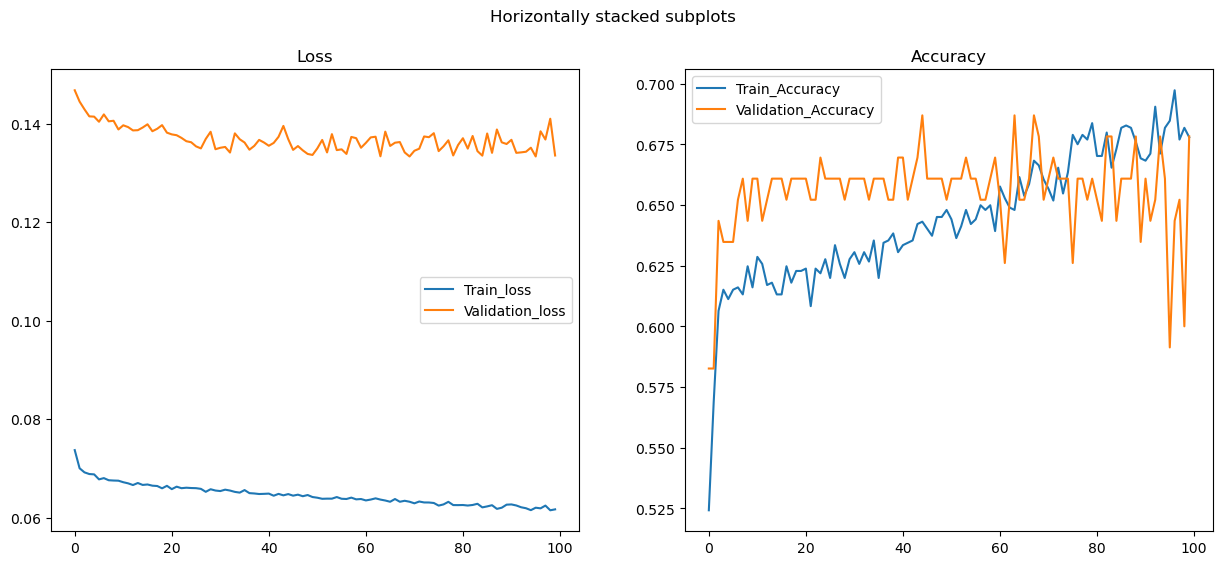

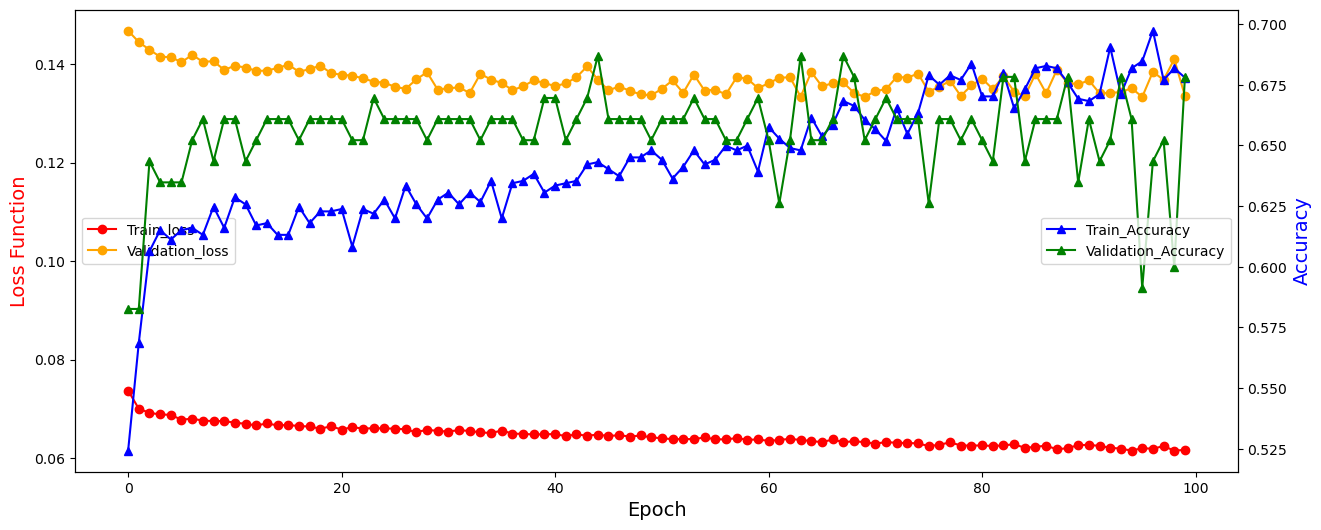

Current time: 81.255 minutes. Time expected till completion: 325.022 minutes

Epoch 101 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.06197094196738311
Val loss:  0.13268005485120027
train accuracy:  0.6673114119922631
Val accuracy:  0.6608695652173913
Current time: 82.005 minutes. Time expected till completion: 323.962 minutes

Epoch 102 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.06234735878800516
Val loss:  0.13395399321680485
train accuracy:  0.6798839458413927
Val accuracy:  0.6782608695652174
Current time: 82.769 minutes. Time expected till completion: 322.960 minutes

Epoch 103 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.06171667823708495
Val loss:  0.1355339122855145
train accuracy:  0.7001934235976789
Val accuracy:  0.6695652173913044
Current time: 83.532 minutes. Time expected till completion: 321.962 minutes

Epoch 104 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.06178189488398037
Val loss:  0.1348650046016859
train accuracy:  0.690522243713733
Val accuracy:  0.6521739130434783
Current time: 84.293 minutes. Time expected till completion: 320.963 minutes

Epoch 105 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.06134060192384849
Val loss:  0.13622943733049475
train accuracy:  0.6972920696324951
Val accuracy:  0.6434782608695652
Current time: 85.056 minutes. Time expected till completion: 319.974 minutes

Epoch 106 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.06102372276483237
Val loss:  0.13503376815630042
train accuracy:  0.6934235976789168
Val accuracy:  0.6521739130434783
Current time: 85.817 minutes. Time expected till completion: 318.980 minutes

Epoch 107 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.061100728737777624
Val loss:  0.13656268067981886
train accuracy:  0.7021276595744681
Val accuracy:  0.6695652173913044
Current time: 86.577 minutes. Time expected till completion: 317.987 minutes

Epoch 108 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.06137966256538258
Val loss:  0.1365757729696191
train accuracy:  0.6934235976789168
Val accuracy:  0.6260869565217392
Current time: 87.336 minutes. Time expected till completion: 316.997 minutes

Epoch 109 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.061270567100329375
Val loss:  0.1335678738096486
train accuracy:  0.7001934235976789
Val accuracy:  0.6260869565217392
Current time: 88.094 minutes. Time expected till completion: 316.007 minutes

Epoch 110 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.061113267560530905
Val loss:  0.13706793163133704
train accuracy:  0.695357833655706
Val accuracy:  0.6695652173913044
Current time: 88.852 minutes. Time expected till completion: 315.022 minutes

Epoch 111 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.06132175884348281
Val loss:  0.13521003774974658
train accuracy:  0.7088974854932302
Val accuracy:  0.6347826086956522
Current time: 89.609 minutes. Time expected till completion: 314.036 minutes

Epoch 112 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.060775696827779654
Val loss:  0.13905414291050122
train accuracy:  0.706963249516441
Val accuracy:  0.6173913043478261
Current time: 90.373 minutes. Time expected till completion: 313.077 minutes

Epoch 113 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.06088298213320498
Val loss:  0.13566789108773936
train accuracy:  0.7214700193423598
Val accuracy:  0.6782608695652174
Current time: 91.136 minutes. Time expected till completion: 312.119 minutes

Epoch 114 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.06007837442180405
Val loss:  0.1378731924554576
train accuracy:  0.7272727272727273
Val accuracy:  0.5652173913043478
Current time: 91.899 minutes. Time expected till completion: 311.168 minutes

Epoch 115 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.06131902285194028
Val loss:  0.1370220168777134
train accuracy:  0.7088974854932302
Val accuracy:  0.6521739130434783
Current time: 92.662 minutes. Time expected till completion: 310.216 minutes

Epoch 116 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.06066680346512933
Val loss:  0.13681788444519044
train accuracy:  0.7127659574468085
Val accuracy:  0.6782608695652174
Current time: 93.427 minutes. Time expected till completion: 309.274 minutes

Epoch 117 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.06103524905800589
Val loss:  0.1381388871566109
train accuracy:  0.7021276595744681
Val accuracy:  0.6173913043478261
Current time: 94.186 minutes. Time expected till completion: 308.320 minutes

Epoch 118 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.06075148102854391
Val loss:  0.13620194922322812
train accuracy:  0.7108317214700194
Val accuracy:  0.6782608695652174
Current time: 94.949 minutes. Time expected till completion: 307.377 minutes

Epoch 119 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.06086888759463622
Val loss:  0.13582324618878572
train accuracy:  0.7127659574468085
Val accuracy:  0.6521739130434783
Current time: 95.707 minutes. Time expected till completion: 306.424 minutes

Epoch 120 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.06070370144954733
Val loss:  0.1346383442049441
train accuracy:  0.7253384912959381
Val accuracy:  0.7043478260869566
Current time: 96.466 minutes. Time expected till completion: 305.474 minutes

Epoch 121 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.060429368535600735
Val loss:  0.13620716851690542
train accuracy:  0.7282398452611218
Val accuracy:  0.6521739130434783
Current time: 97.223 minutes. Time expected till completion: 304.526 minutes

Epoch 122 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.05964783687194957
Val loss:  0.13673692578854768
train accuracy:  0.7224371373307543
Val accuracy:  0.6695652173913044
Current time: 97.987 minutes. Time expected till completion: 303.599 minutes

Epoch 123 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.060407421344484076
Val loss:  0.13848970765652863
train accuracy:  0.730174081237911
Val accuracy:  0.6347826086956522
Current time: 98.752 minutes. Time expected till completion: 302.679 minutes

Epoch 124 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.05969575422183688
Val loss:  0.1409683688827183
train accuracy:  0.7475822050290135
Val accuracy:  0.6521739130434783
Current time: 99.515 minutes. Time expected till completion: 301.756 minutes

Epoch 125 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.060103579116282654
Val loss:  0.1401801637981249
train accuracy:  0.7350096711798839
Val accuracy:  0.6260869565217392
Current time: 100.279 minutes. Time expected till completion: 300.836 minutes

Epoch 126 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.06049748540385779
Val loss:  0.13549731036891108
train accuracy:  0.7388781431334622
Val accuracy:  0.6695652173913044
Current time: 101.040 minutes. Time expected till completion: 299.914 minutes

Epoch 127 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.060087418360221315
Val loss:  0.1410306655842325
train accuracy:  0.7321083172147002
Val accuracy:  0.6347826086956522
Current time: 101.800 minutes. Time expected till completion: 298.987 minutes

Epoch 128 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.05903571947861456
Val loss:  0.13434500642444777
train accuracy:  0.7504835589941973
Val accuracy:  0.6521739130434783
Current time: 102.561 minutes. Time expected till completion: 298.069 minutes

Epoch 129 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.059545108554902804
Val loss:  0.13419439533482427
train accuracy:  0.741779497098646
Val accuracy:  0.6434782608695652
Current time: 103.324 minutes. Time expected till completion: 297.158 minutes

Epoch 130 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.0592822660791113
Val loss:  0.1357405361921891
train accuracy:  0.753384912959381
Val accuracy:  0.6782608695652174
Current time: 104.079 minutes. Time expected till completion: 296.226 minutes

Epoch 131 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.059985389619546886
Val loss:  0.13649930332017982
train accuracy:  0.7340425531914894
Val accuracy:  0.6608695652173913
Current time: 104.836 minutes. Time expected till completion: 295.303 minutes

Epoch 132 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.059357758013376644
Val loss:  0.1377673698508221
train accuracy:  0.7408123791102514
Val accuracy:  0.6434782608695652
Current time: 105.593 minutes. Time expected till completion: 294.380 minutes

Epoch 133 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.05962024908692971
Val loss:  0.13517124704692673
train accuracy:  0.7446808510638298
Val accuracy:  0.6608695652173913
Current time: 106.351 minutes. Time expected till completion: 293.465 minutes

Epoch 134 of 500


100%|██████████| 15/15 [00:02<00:00,  6.07it/s]


train loss:  0.05970565447263146
Val loss:  0.13194087484608527
train accuracy:  0.7321083172147002
Val accuracy:  0.6695652173913044
Current time: 107.107 minutes. Time expected till completion: 292.547 minutes

Epoch 135 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.05899054359651857
Val loss:  0.13895705420037974
train accuracy:  0.7591876208897486
Val accuracy:  0.6260869565217392
Current time: 107.863 minutes. Time expected till completion: 291.629 minutes

Epoch 136 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.05971824978721441
Val loss:  0.13733097107514092
train accuracy:  0.7524177949709865
Val accuracy:  0.6608695652173913
Current time: 108.619 minutes. Time expected till completion: 290.715 minutes

Epoch 137 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.05953065973185939
Val loss:  0.13913433137147324
train accuracy:  0.7388781431334622
Val accuracy:  0.6086956521739131
Current time: 109.379 minutes. Time expected till completion: 289.814 minutes

Epoch 138 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.0596259466914651
Val loss:  0.1337250362271848
train accuracy:  0.7437137330754352
Val accuracy:  0.6695652173913044
Current time: 110.138 minutes. Time expected till completion: 288.914 minutes

Epoch 139 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.05901400851557748
Val loss:  0.1376704708389614
train accuracy:  0.7707930367504836
Val accuracy:  0.6347826086956522
Current time: 110.902 minutes. Time expected till completion: 288.026 minutes

Epoch 140 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.05859786335458147
Val loss:  0.14081178851749587
train accuracy:  0.7688588007736944
Val accuracy:  0.6173913043478261
Current time: 111.661 minutes. Time expected till completion: 287.128 minutes

Epoch 141 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.05955705640394406
Val loss:  0.13691718163697617
train accuracy:  0.7456479690522244
Val accuracy:  0.6608695652173913
Current time: 112.418 minutes. Time expected till completion: 286.228 minutes

Epoch 142 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.05828113810697884
Val loss:  0.13608857341434644
train accuracy:  0.7727272727272727
Val accuracy:  0.6695652173913044
Current time: 113.174 minutes. Time expected till completion: 285.326 minutes

Epoch 143 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.05846690053635455
Val loss:  0.13680242714674576
train accuracy:  0.7746615087040619
Val accuracy:  0.6782608695652174
Current time: 113.932 minutes. Time expected till completion: 284.431 minutes

Epoch 144 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.05910249760579786
Val loss:  0.147457914767058
train accuracy:  0.769825918762089
Val accuracy:  0.6086956521739131
Current time: 114.690 minutes. Time expected till completion: 283.539 minutes

Epoch 145 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.05854642206741717
Val loss:  0.13292362897292428
train accuracy:  0.769825918762089
Val accuracy:  0.6695652173913044
Current time: 115.449 minutes. Time expected till completion: 282.650 minutes

Epoch 146 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.0583558279725523
Val loss:  0.13536082454349685
train accuracy:  0.7833655705996132
Val accuracy:  0.6956521739130435
Current time: 116.205 minutes. Time expected till completion: 281.757 minutes

Epoch 147 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.058664812744240236
Val loss:  0.13512651142866716
train accuracy:  0.7717601547388782
Val accuracy:  0.6869565217391305
Current time: 116.960 minutes. Time expected till completion: 280.863 minutes

Epoch 148 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.05872828955807123
Val loss:  0.13777019303777943
train accuracy:  0.7727272727272727
Val accuracy:  0.6782608695652174
Current time: 117.716 minutes. Time expected till completion: 279.974 minutes

Epoch 149 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.05804782131654382
Val loss:  0.1373593667279119
train accuracy:  0.7901353965183753
Val accuracy:  0.6086956521739131
Current time: 118.474 minutes. Time expected till completion: 279.089 minutes

Epoch 150 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.05879374900454479
Val loss:  0.1369356798089069
train accuracy:  0.7727272727272727
Val accuracy:  0.6608695652173913
Current time: 119.229 minutes. Time expected till completion: 278.201 minutes

Epoch 151 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.05854384500237913
Val loss:  0.13986313602198724
train accuracy:  0.7794970986460348
Val accuracy:  0.6
Current time: 119.983 minutes. Time expected till completion: 277.313 minutes

Epoch 152 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.057640457925759614
Val loss:  0.13436055079750392
train accuracy:  0.7978723404255319
Val accuracy:  0.6956521739130435
Current time: 120.736 minutes. Time expected till completion: 276.422 minutes

Epoch 153 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.057684838714175346
Val loss:  0.13352693733961685
train accuracy:  0.8007736943907157
Val accuracy:  0.6956521739130435
Current time: 121.489 minutes. Time expected till completion: 275.534 minutes

Epoch 154 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.05771123947903543
Val loss:  0.13434096471123072
train accuracy:  0.8104448742746615
Val accuracy:  0.6956521739130435
Current time: 122.244 minutes. Time expected till completion: 274.652 minutes

Epoch 155 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.05759245485816749
Val loss:  0.14072922468185425
train accuracy:  0.8085106382978723
Val accuracy:  0.6434782608695652
Current time: 122.997 minutes. Time expected till completion: 273.766 minutes

Epoch 156 of 500


100%|██████████| 15/15 [00:02<00:00,  6.23it/s]


train loss:  0.057849920695247685
Val loss:  0.13894670683404672
train accuracy:  0.7940038684719536
Val accuracy:  0.6434782608695652
Current time: 123.751 minutes. Time expected till completion: 272.888 minutes

Epoch 157 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.05822351090682083
Val loss:  0.137385486519855
train accuracy:  0.7872340425531915
Val accuracy:  0.6521739130434783
Current time: 124.504 minutes. Time expected till completion: 272.006 minutes

Epoch 158 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.057701622148546995
Val loss:  0.14052953668262647
train accuracy:  0.811411992263056
Val accuracy:  0.6347826086956522
Current time: 125.259 minutes. Time expected till completion: 271.130 minutes

Epoch 159 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.057864655781991244
Val loss:  0.1377408665159474
train accuracy:  0.7978723404255319
Val accuracy:  0.6434782608695652
Current time: 126.012 minutes. Time expected till completion: 270.252 minutes

Epoch 160 of 500


100%|██████████| 15/15 [00:02<00:00,  6.31it/s]


train loss:  0.05698078553727333
Val loss:  0.1371546076691669
train accuracy:  0.8085106382978723
Val accuracy:  0.6434782608695652
Current time: 126.766 minutes. Time expected till completion: 269.377 minutes

Epoch 161 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.057300294852118426
Val loss:  0.13627056194388348
train accuracy:  0.7988394584139265
Val accuracy:  0.6869565217391305
Current time: 127.524 minutes. Time expected till completion: 268.514 minutes

Epoch 162 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.05667277818952815
Val loss:  0.1361856636793717
train accuracy:  0.8172147001934236
Val accuracy:  0.6173913043478261
Current time: 128.287 minutes. Time expected till completion: 267.660 minutes

Epoch 163 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.057584925477232644
Val loss:  0.13588669870210732
train accuracy:  0.8133462282398453
Val accuracy:  0.6869565217391305
Current time: 129.053 minutes. Time expected till completion: 266.815 minutes

Epoch 164 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.05651483510402923
Val loss:  0.13772696256637573
train accuracy:  0.8336557059961315
Val accuracy:  0.6608695652173913
Current time: 129.817 minutes. Time expected till completion: 265.967 minutes

Epoch 165 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.0565669586165039
Val loss:  0.137090730148813
train accuracy:  0.8268858800773694
Val accuracy:  0.6695652173913044
Current time: 130.584 minutes. Time expected till completion: 265.125 minutes

Epoch 166 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.05683023498413411
Val loss:  0.13619566326555999
train accuracy:  0.8268858800773694
Val accuracy:  0.6695652173913044
Current time: 131.348 minutes. Time expected till completion: 264.279 minutes

Epoch 167 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.057028487122958126
Val loss:  0.1415217472159344
train accuracy:  0.8172147001934236
Val accuracy:  0.6260869565217392
Current time: 132.114 minutes. Time expected till completion: 263.437 minutes

Epoch 168 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.05691693380215643
Val loss:  0.1407592623130135
train accuracy:  0.8172147001934236
Val accuracy:  0.6173913043478261
Current time: 132.878 minutes. Time expected till completion: 262.592 minutes

Epoch 169 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.05701604450924945
Val loss:  0.13400205218273661
train accuracy:  0.8181818181818182
Val accuracy:  0.6608695652173913
Current time: 133.641 minutes. Time expected till completion: 261.746 minutes

Epoch 170 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.05674414679667475
Val loss:  0.14166745621225107
train accuracy:  0.8307543520309478
Val accuracy:  0.6347826086956522
Current time: 134.402 minutes. Time expected till completion: 260.897 minutes

Epoch 171 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.0564328592335463
Val loss:  0.14574103666388472
train accuracy:  0.8201160541586073
Val accuracy:  0.6
Current time: 135.161 minutes. Time expected till completion: 260.047 minutes

Epoch 172 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.05679281260566047
Val loss:  0.14044661573741746
train accuracy:  0.8191489361702128
Val accuracy:  0.6347826086956522
Current time: 135.925 minutes. Time expected till completion: 259.205 minutes

Epoch 173 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.056875042343508576
Val loss:  0.13674222334571506
train accuracy:  0.8133462282398453
Val accuracy:  0.6521739130434783
Current time: 136.687 minutes. Time expected till completion: 258.361 minutes

Epoch 174 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.0569808145902143
Val loss:  0.13686524422272392
train accuracy:  0.8123791102514507
Val accuracy:  0.6608695652173913
Current time: 137.452 minutes. Time expected till completion: 257.525 minutes

Epoch 175 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.056204335428990525
Val loss:  0.1384386358053788
train accuracy:  0.8326885880077369
Val accuracy:  0.6695652173913044
Current time: 138.214 minutes. Time expected till completion: 256.683 minutes

Epoch 176 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.05639510101690975
Val loss:  0.1360725656799648
train accuracy:  0.8307543520309478
Val accuracy:  0.6521739130434783
Current time: 138.977 minutes. Time expected till completion: 255.845 minutes

Epoch 177 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.0570488881096388
Val loss:  0.13763245033181232
train accuracy:  0.8201160541586073
Val accuracy:  0.6173913043478261
Current time: 139.739 minutes. Time expected till completion: 255.004 minutes

Epoch 178 of 500


100%|██████████| 15/15 [00:02<00:00,  6.01it/s]


train loss:  0.05557459517881073
Val loss:  0.1350522227909254
train accuracy:  0.8520309477756286
Val accuracy:  0.7130434782608696
Current time: 140.501 minutes. Time expected till completion: 254.164 minutes

Epoch 179 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.05614680697424499
Val loss:  0.13808099497919496
train accuracy:  0.8413926499032882
Val accuracy:  0.6521739130434783
Current time: 141.268 minutes. Time expected till completion: 253.336 minutes

Epoch 180 of 500


100%|██████████| 15/15 [00:02<00:00,  6.10it/s]


train loss:  0.056250503030920856
Val loss:  0.13346871811410654
train accuracy:  0.8355899419729207
Val accuracy:  0.6956521739130435
Current time: 142.033 minutes. Time expected till completion: 252.503 minutes

Epoch 181 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.05615589985303307
Val loss:  0.14115523203559543
train accuracy:  0.8365570599613152
Val accuracy:  0.6608695652173913
Current time: 142.800 minutes. Time expected till completion: 251.674 minutes

Epoch 182 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.0553513307059526
Val loss:  0.1397860226423844
train accuracy:  0.8452611218568665
Val accuracy:  0.6173913043478261
Current time: 143.565 minutes. Time expected till completion: 250.844 minutes

Epoch 183 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.05591565497378086
Val loss:  0.13399162603461223
train accuracy:  0.8355899419729207
Val accuracy:  0.6956521739130435
Current time: 144.327 minutes. Time expected till completion: 250.008 minutes

Epoch 184 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.055963034037234016
Val loss:  0.13630642994590428
train accuracy:  0.8307543520309478
Val accuracy:  0.6695652173913044
Current time: 145.091 minutes. Time expected till completion: 249.178 minutes

Epoch 185 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.05521217242200324
Val loss:  0.13562057225600532
train accuracy:  0.8452611218568665
Val accuracy:  0.6869565217391305
Current time: 145.852 minutes. Time expected till completion: 248.343 minutes

Epoch 186 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.05541831572005089
Val loss:  0.13403929938440737
train accuracy:  0.8481624758220503
Val accuracy:  0.7130434782608696
Current time: 146.614 minutes. Time expected till completion: 247.510 minutes

Epoch 187 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.05585051107452732
Val loss:  0.14002369331276934
train accuracy:  0.8404255319148937
Val accuracy:  0.6347826086956522
Current time: 147.380 minutes. Time expected till completion: 246.684 minutes

Epoch 188 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.05558721499240145
Val loss:  0.1411102170529573
train accuracy:  0.8452611218568665
Val accuracy:  0.6
Current time: 148.142 minutes. Time expected till completion: 245.853 minutes

Epoch 189 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.055388569831848145
Val loss:  0.13820541578790416
train accuracy:  0.8404255319148937
Val accuracy:  0.6434782608695652
Current time: 148.906 minutes. Time expected till completion: 245.025 minutes

Epoch 190 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.055417180118985054
Val loss:  0.13725041513857633
train accuracy:  0.8491295938104448
Val accuracy:  0.6782608695652174
Current time: 149.667 minutes. Time expected till completion: 244.193 minutes

Epoch 191 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.0545976576998801
Val loss:  0.1380907504454903
train accuracy:  0.867504835589942
Val accuracy:  0.6521739130434783
Current time: 150.426 minutes. Time expected till completion: 243.360 minutes

Epoch 192 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.054730512763822105
Val loss:  0.1573344691939976
train accuracy:  0.8597678916827853
Val accuracy:  0.4782608695652174
Current time: 151.184 minutes. Time expected till completion: 242.525 minutes

Epoch 193 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.05485199498484628
Val loss:  0.14705197344655577
train accuracy:  0.8529980657640233
Val accuracy:  0.5391304347826087
Current time: 151.940 minutes. Time expected till completion: 241.687 minutes

Epoch 194 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.05480243925660906
Val loss:  0.13747589277184527
train accuracy:  0.8578336557059961
Val accuracy:  0.6434782608695652
Current time: 152.697 minutes. Time expected till completion: 240.853 minutes

Epoch 195 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.054273305594114085
Val loss:  0.1399107336997986
train accuracy:  0.8762088974854932
Val accuracy:  0.6521739130434783
Current time: 153.456 minutes. Time expected till completion: 240.021 minutes

Epoch 196 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.054188280548302305
Val loss:  0.13457612524861876
train accuracy:  0.8820116054158608
Val accuracy:  0.6608695652173913
Current time: 154.216 minutes. Time expected till completion: 239.192 minutes

Epoch 197 of 500


100%|██████████| 15/15 [00:02<00:00,  5.95it/s]


train loss:  0.05470459229480367
Val loss:  0.14610110935957535
train accuracy:  0.867504835589942
Val accuracy:  0.6260869565217392
Current time: 155.005 minutes. Time expected till completion: 238.409 minutes

Epoch 198 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.05401780111877323
Val loss:  0.13638841276583463
train accuracy:  0.8820116054158608
Val accuracy:  0.6956521739130435
Current time: 155.839 minutes. Time expected till completion: 237.693 minutes

Epoch 199 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.0544581308355645
Val loss:  0.13843340199926626
train accuracy:  0.8558994197292069
Val accuracy:  0.6347826086956522
Current time: 156.626 minutes. Time expected till completion: 236.907 minutes

Epoch 200 of 500


100%|██████████| 15/15 [00:02<00:00,  6.01it/s]


train loss:  0.054659533489142445
Val loss:  0.13781496804693472
train accuracy:  0.8665377176015474
Val accuracy:  0.6521739130434783
Saving model checkpoint


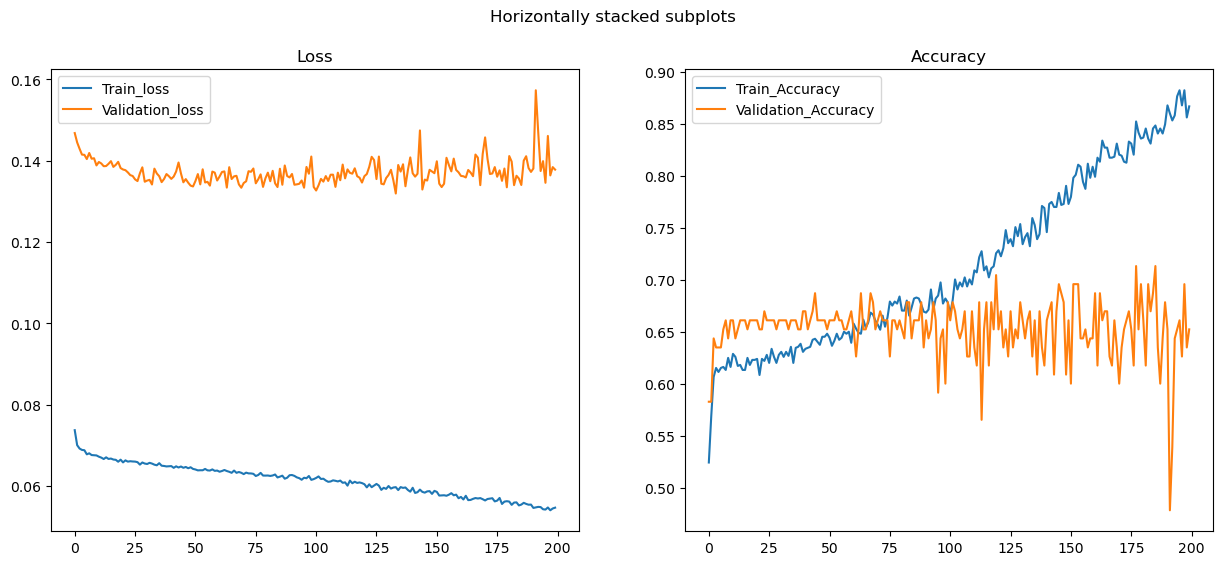

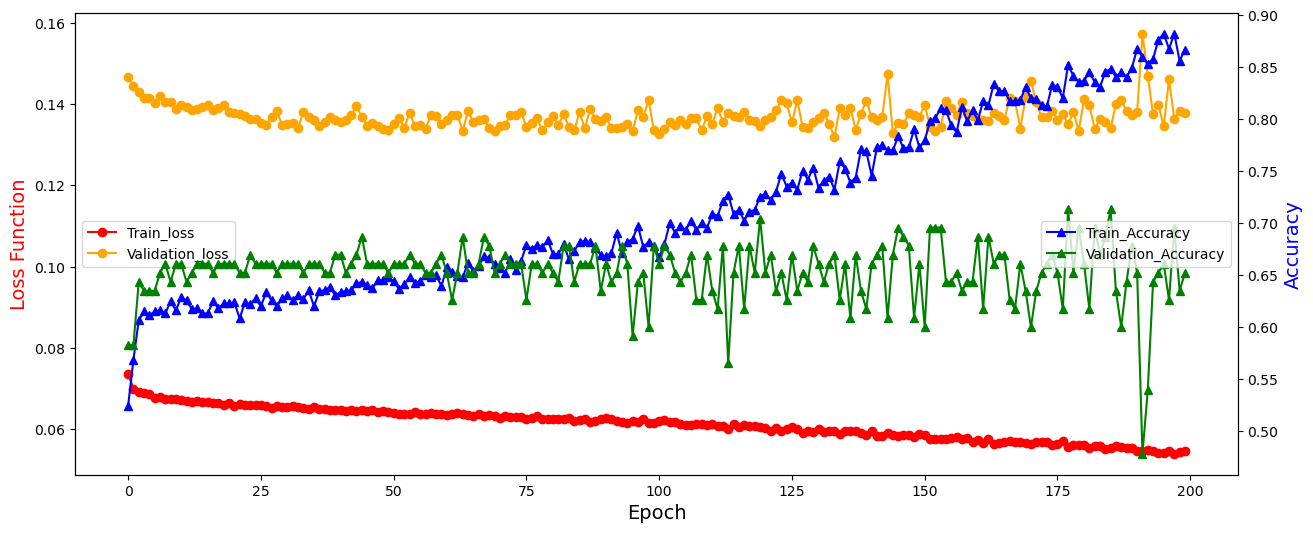

Current time: 157.449 minutes. Time expected till completion: 236.173 minutes

Epoch 201 of 500


100%|██████████| 15/15 [00:02<00:00,  6.02it/s]


train loss:  0.055320939715641844
Val loss:  0.1363961670709693
train accuracy:  0.8452611218568665
Val accuracy:  0.6260869565217392
Current time: 158.269 minutes. Time expected till completion: 235.435 minutes

Epoch 202 of 500


100%|██████████| 15/15 [00:02<00:00,  6.01it/s]


train loss:  0.0545420318669
Val loss:  0.13951507029326066
train accuracy:  0.867504835589942
Val accuracy:  0.6434782608695652
Current time: 159.072 minutes. Time expected till completion: 234.670 minutes

Epoch 203 of 500


100%|██████████| 15/15 [00:02<00:00,  6.07it/s]


train loss:  0.05351038556726113
Val loss:  0.13442951181660528
train accuracy:  0.8849129593810445
Val accuracy:  0.6869565217391305
Current time: 159.875 minutes. Time expected till completion: 233.905 minutes

Epoch 204 of 500


100%|██████████| 15/15 [00:02<00:00,  6.08it/s]


train loss:  0.054475435608821406
Val loss:  0.13751457877781081
train accuracy:  0.867504835589942
Val accuracy:  0.6695652173913044
Current time: 160.679 minutes. Time expected till completion: 233.141 minutes

Epoch 205 of 500


100%|██████████| 15/15 [00:02<00:00,  6.10it/s]


train loss:  0.05453920531549583
Val loss:  0.14854377041692318
train accuracy:  0.8723404255319149
Val accuracy:  0.6
Current time: 161.477 minutes. Time expected till completion: 232.369 minutes

Epoch 206 of 500


100%|██████████| 15/15 [00:02<00:00,  6.06it/s]


train loss:  0.05453437964505799
Val loss:  0.1367710460787234
train accuracy:  0.8694390715667312
Val accuracy:  0.6695652173913044
Current time: 162.278 minutes. Time expected till completion: 231.600 minutes

Epoch 207 of 500


100%|██████████| 15/15 [00:02<00:00,  6.01it/s]


train loss:  0.053597043803397644
Val loss:  0.15661096002744593
train accuracy:  0.8878143133462283
Val accuracy:  0.5217391304347826
Current time: 163.102 minutes. Time expected till completion: 230.864 minutes

Epoch 208 of 500


100%|██████████| 15/15 [00:02<00:00,  6.03it/s]


train loss:  0.05445429521326401
Val loss:  0.1373433672863504
train accuracy:  0.867504835589942
Val accuracy:  0.6695652173913044
Current time: 163.891 minutes. Time expected till completion: 230.078 minutes

Epoch 209 of 500


100%|██████████| 15/15 [00:02<00:00,  5.90it/s]


train loss:  0.05356012593154981
Val loss:  0.13801160066024118
train accuracy:  0.8878143133462283
Val accuracy:  0.6260869565217392
Current time: 164.695 minutes. Time expected till completion: 229.313 minutes

Epoch 210 of 500


100%|██████████| 15/15 [00:02<00:00,  5.59it/s]


train loss:  0.0537540495280371
Val loss:  0.1334263298822486
train accuracy:  0.8839458413926499
Val accuracy:  0.7130434782608696
Current time: 165.495 minutes. Time expected till completion: 228.541 minutes

Epoch 211 of 500


100%|██████████| 15/15 [00:02<00:00,  6.03it/s]


train loss:  0.05413404118622756
Val loss:  0.13219880124796993
train accuracy:  0.8752417794970987
Val accuracy:  0.6956521739130435
Current time: 166.291 minutes. Time expected till completion: 227.763 minutes

Epoch 212 of 500


100%|██████████| 15/15 [00:02<00:00,  6.07it/s]


train loss:  0.053956665891282105
Val loss:  0.13749659942544024
train accuracy:  0.8810444874274661
Val accuracy:  0.6521739130434783
Current time: 167.106 minutes. Time expected till completion: 227.012 minutes

Epoch 213 of 500


100%|██████████| 15/15 [00:02<00:00,  6.07it/s]


train loss:  0.053915773242769666
Val loss:  0.13975120212720787
train accuracy:  0.8781431334622823
Val accuracy:  0.6521739130434783
Current time: 167.909 minutes. Time expected till completion: 226.244 minutes

Epoch 214 of 500


100%|██████████| 15/15 [00:02<00:00,  6.00it/s]


train loss:  0.053677984662858384
Val loss:  0.13546150093493253
train accuracy:  0.8781431334622823
Val accuracy:  0.6869565217391305
Current time: 168.733 minutes. Time expected till completion: 225.502 minutes

Epoch 215 of 500


100%|██████████| 15/15 [00:02<00:00,  6.04it/s]


train loss:  0.05338193922946716
Val loss:  0.13413323785947717
train accuracy:  0.8916827852998066
Val accuracy:  0.6869565217391305
Current time: 169.533 minutes. Time expected till completion: 224.730 minutes

Epoch 216 of 500


100%|██████████| 15/15 [00:02<00:00,  6.00it/s]


train loss:  0.05352336329694412
Val loss:  0.137845996670101
train accuracy:  0.8800773694390716
Val accuracy:  0.6695652173913044
Current time: 170.326 minutes. Time expected till completion: 223.947 minutes

Epoch 217 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.0538176246837675
Val loss:  0.14329824706782465
train accuracy:  0.8878143133462283
Val accuracy:  0.6521739130434783
Current time: 171.149 minutes. Time expected till completion: 223.203 minutes

Epoch 218 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.054068997069991534
Val loss:  0.13860386143559994
train accuracy:  0.8684719535783365
Val accuracy:  0.6260869565217392
Current time: 171.947 minutes. Time expected till completion: 222.427 minutes

Epoch 219 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.0536113621764303
Val loss:  0.13766388167505678
train accuracy:  0.8907156673114119
Val accuracy:  0.6434782608695652
Current time: 172.753 minutes. Time expected till completion: 221.660 minutes

Epoch 220 of 500


100%|██████████| 15/15 [00:02<00:00,  5.52it/s]


train loss:  0.05309514047098805
Val loss:  0.14267496596211973
train accuracy:  0.8878143133462283
Val accuracy:  0.6
Current time: 173.560 minutes. Time expected till completion: 220.894 minutes

Epoch 221 of 500


100%|██████████| 15/15 [00:02<00:00,  5.99it/s]


train loss:  0.05341739183007172
Val loss:  0.1384323747261711
train accuracy:  0.8829787234042553
Val accuracy:  0.6086956521739131
Current time: 174.365 minutes. Time expected till completion: 220.126 minutes

Epoch 222 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.053490192966258274
Val loss:  0.1446178285971932
train accuracy:  0.8907156673114119
Val accuracy:  0.591304347826087
Current time: 175.181 minutes. Time expected till completion: 219.371 minutes

Epoch 223 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.05317669080811727
Val loss:  0.1345731372418611
train accuracy:  0.8800773694390716
Val accuracy:  0.6956521739130435
Current time: 175.965 minutes. Time expected till completion: 218.576 minutes

Epoch 224 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.05319033813891604
Val loss:  0.1454457806504291
train accuracy:  0.8858800773694391
Val accuracy:  0.591304347826087
Current time: 176.754 minutes. Time expected till completion: 217.786 minutes

Epoch 225 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.052790148979921174
Val loss:  0.1391546067984208
train accuracy:  0.902321083172147
Val accuracy:  0.6434782608695652
Current time: 177.521 minutes. Time expected till completion: 216.970 minutes

Epoch 226 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.05309249354054434
Val loss:  0.13733649046524712
train accuracy:  0.8887814313346228
Val accuracy:  0.6869565217391305
Current time: 178.288 minutes. Time expected till completion: 216.155 minutes

Epoch 227 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.052590766600990664
Val loss:  0.14640228955642037
train accuracy:  0.9090909090909091
Val accuracy:  0.6086956521739131
Current time: 179.056 minutes. Time expected till completion: 215.341 minutes

Epoch 228 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.052537750229383576
Val loss:  0.14138947880786398
train accuracy:  0.9003868471953579
Val accuracy:  0.6347826086956522
Current time: 179.820 minutes. Time expected till completion: 214.523 minutes

Epoch 229 of 500


100%|██████████| 15/15 [00:02<00:00,  5.68it/s]


train loss:  0.053398522175488204
Val loss:  0.13626896609430728
train accuracy:  0.8868471953578336
Val accuracy:  0.6782608695652174
Current time: 180.588 minutes. Time expected till completion: 213.709 minutes

Epoch 230 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.05267506128814742
Val loss:  0.14073055205137833
train accuracy:  0.9129593810444874
Val accuracy:  0.6347826086956522
Current time: 181.368 minutes. Time expected till completion: 212.911 minutes

Epoch 231 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.05247806885948034
Val loss:  0.13832931414894437
train accuracy:  0.9003868471953579
Val accuracy:  0.6521739130434783
Current time: 182.171 minutes. Time expected till completion: 212.138 minutes

Epoch 232 of 500


100%|██████████| 15/15 [00:02<00:00,  6.00it/s]


train loss:  0.05271469947217281
Val loss:  0.13984752012335736
train accuracy:  0.9081237911025145
Val accuracy:  0.6173913043478261
Current time: 182.975 minutes. Time expected till completion: 211.368 minutes

Epoch 233 of 500


100%|██████████| 15/15 [00:02<00:00,  6.01it/s]


train loss:  0.05293407373317667
Val loss:  0.13663871236469435
train accuracy:  0.8984526112185687
Val accuracy:  0.6956521739130435
Current time: 183.774 minutes. Time expected till completion: 210.591 minutes

Epoch 234 of 500


100%|██████████| 15/15 [00:02<00:00,  6.03it/s]


train loss:  0.052126710373382276
Val loss:  0.1496277321939883
train accuracy:  0.9100580270793037
Val accuracy:  0.591304347826087
Current time: 184.571 minutes. Time expected till completion: 209.811 minutes

Epoch 235 of 500


100%|██████████| 15/15 [00:02<00:00,  6.06it/s]


train loss:  0.053083969499894225
Val loss:  0.1371808902077053
train accuracy:  0.8965183752417795
Val accuracy:  0.6260869565217392
Current time: 185.367 minutes. Time expected till completion: 209.031 minutes

Epoch 236 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.05194925910269038
Val loss:  0.13713822001996248
train accuracy:  0.9119922630560928
Val accuracy:  0.6695652173913044
Current time: 186.183 minutes. Time expected till completion: 208.272 minutes

Epoch 237 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.05217913156321247
Val loss:  0.13984602741573168
train accuracy:  0.913926499032882
Val accuracy:  0.6347826086956522
Current time: 186.983 minutes. Time expected till completion: 207.496 minutes

Epoch 238 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.05208008317006626
Val loss:  0.13640991086545198
train accuracy:  0.9148936170212766
Val accuracy:  0.6869565217391305
Current time: 187.783 minutes. Time expected till completion: 206.719 minutes

Epoch 239 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.0527988567919519
Val loss:  0.13936189516730932
train accuracy:  0.8907156673114119
Val accuracy:  0.6434782608695652
Current time: 188.588 minutes. Time expected till completion: 205.947 minutes

Epoch 240 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.05229239376186172
Val loss:  0.1377067498538805
train accuracy:  0.9052224371373307
Val accuracy:  0.6260869565217392
Current time: 189.399 minutes. Time expected till completion: 205.182 minutes

Epoch 241 of 500


100%|██████████| 15/15 [00:02<00:00,  5.94it/s]


train loss:  0.052540452786986096
Val loss:  0.1463693354440772
train accuracy:  0.9052224371373307
Val accuracy:  0.591304347826087
Current time: 190.213 minutes. Time expected till completion: 204.420 minutes

Epoch 242 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.0524914916064338
Val loss:  0.13827897465747335
train accuracy:  0.90715667311412
Val accuracy:  0.6608695652173913
Current time: 191.009 minutes. Time expected till completion: 203.638 minutes

Epoch 243 of 500


100%|██████████| 15/15 [00:02<00:00,  5.33it/s]


train loss:  0.05242583282450412
Val loss:  0.14077407225318578
train accuracy:  0.9042553191489362
Val accuracy:  0.6260869565217392
Current time: 191.819 minutes. Time expected till completion: 202.870 minutes

Epoch 244 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.05186819448000688
Val loss:  0.14280463301617166
train accuracy:  0.9197292069632496
Val accuracy:  0.6260869565217392
Current time: 192.622 minutes. Time expected till completion: 202.095 minutes

Epoch 245 of 500


100%|██████████| 15/15 [00:02<00:00,  6.10it/s]


train loss:  0.052117599682374435
Val loss:  0.1499208538428597
train accuracy:  0.9129593810444874
Val accuracy:  0.5565217391304348
Current time: 193.418 minutes. Time expected till completion: 201.312 minutes

Epoch 246 of 500


100%|██████████| 15/15 [00:02<00:00,  6.10it/s]


train loss:  0.05179294828520061
Val loss:  0.14073747033658235
train accuracy:  0.9226305609284333
Val accuracy:  0.6347826086956522
Current time: 194.220 minutes. Time expected till completion: 200.536 minutes

Epoch 247 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.05190329002919004
Val loss:  0.13661861989809118
train accuracy:  0.9158607350096711
Val accuracy:  0.6782608695652174
Current time: 195.012 minutes. Time expected till completion: 199.749 minutes

Epoch 248 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.051820650667932094
Val loss:  0.14236479220183
train accuracy:  0.9168278529980658
Val accuracy:  0.6086956521739131
Current time: 195.806 minutes. Time expected till completion: 198.964 minutes

Epoch 249 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.05230188000824742
Val loss:  0.14576503142066624
train accuracy:  0.9158607350096711
Val accuracy:  0.6
Current time: 196.600 minutes. Time expected till completion: 198.179 minutes

Epoch 250 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.051762535620473574
Val loss:  0.13999543863794078
train accuracy:  0.9090909090909091
Val accuracy:  0.6347826086956522
Current time: 197.396 minutes. Time expected till completion: 197.396 minutes

Epoch 251 of 500


100%|██████████| 15/15 [00:02<00:00,  6.08it/s]


train loss:  0.05247698012357524
Val loss:  0.13748663923014764
train accuracy:  0.9032882011605415
Val accuracy:  0.6608695652173913
Current time: 198.203 minutes. Time expected till completion: 196.623 minutes

Epoch 252 of 500


100%|██████████| 15/15 [00:02<00:00,  6.07it/s]


train loss:  0.05191382569777896
Val loss:  0.13302085814268694
train accuracy:  0.9177949709864603
Val accuracy:  0.6956521739130435
Current time: 199.004 minutes. Time expected till completion: 195.845 minutes

Epoch 253 of 500


100%|██████████| 15/15 [00:02<00:00,  6.07it/s]


train loss:  0.05175009427494883
Val loss:  0.1411543809849283
train accuracy:  0.9177949709864603
Val accuracy:  0.6173913043478261
Current time: 199.817 minutes. Time expected till completion: 195.078 minutes

Epoch 254 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.05229706782667503
Val loss:  0.1350093820820684
train accuracy:  0.8994197292069632
Val accuracy:  0.6521739130434783
Current time: 200.634 minutes. Time expected till completion: 194.315 minutes

Epoch 255 of 500


100%|██████████| 15/15 [00:02<00:00,  6.02it/s]


train loss:  0.051579057478581915
Val loss:  0.13832609135171642
train accuracy:  0.9129593810444874
Val accuracy:  0.6608695652173913
Current time: 201.446 minutes. Time expected till completion: 193.546 minutes

Epoch 256 of 500


100%|██████████| 15/15 [00:02<00:00,  6.06it/s]


train loss:  0.05175341801209883
Val loss:  0.14619191936824633
train accuracy:  0.9148936170212766
Val accuracy:  0.5739130434782609
Current time: 202.252 minutes. Time expected till completion: 192.772 minutes

Epoch 257 of 500


100%|██████████| 15/15 [00:02<00:00,  5.36it/s]


train loss:  0.05118718824026894
Val loss:  0.145701293323351
train accuracy:  0.9303675048355899
Val accuracy:  0.6086956521739131
Current time: 203.068 minutes. Time expected till completion: 192.006 minutes

Epoch 258 of 500


100%|██████████| 15/15 [00:02<00:00,  5.27it/s]


train loss:  0.05243446016449993
Val loss:  0.13797976089560468
train accuracy:  0.9003868471953579
Val accuracy:  0.6608695652173913
Current time: 203.880 minutes. Time expected till completion: 191.236 minutes

Epoch 259 of 500


100%|██████████| 15/15 [00:02<00:00,  6.07it/s]


train loss:  0.05168024887199328
Val loss:  0.14507358022358108
train accuracy:  0.9197292069632496
Val accuracy:  0.6173913043478261
Current time: 204.698 minutes. Time expected till completion: 190.471 minutes

Epoch 260 of 500


100%|██████████| 15/15 [00:02<00:00,  5.99it/s]


train loss:  0.05141701176042022
Val loss:  0.13739094786022021
train accuracy:  0.9177949709864603
Val accuracy:  0.6434782608695652
Current time: 205.514 minutes. Time expected till completion: 189.705 minutes

Epoch 261 of 500


100%|██████████| 15/15 [00:02<00:00,  6.00it/s]


train loss:  0.051779738708437065
Val loss:  0.13476484754811163
train accuracy:  0.9148936170212766
Val accuracy:  0.6869565217391305
Current time: 206.323 minutes. Time expected till completion: 188.931 minutes

Epoch 262 of 500


100%|██████████| 15/15 [00:02<00:00,  5.99it/s]


train loss:  0.05135290517797784
Val loss:  0.13418386293494183
train accuracy:  0.9245647969052224
Val accuracy:  0.7043478260869566
Current time: 207.144 minutes. Time expected till completion: 188.169 minutes

Epoch 263 of 500


100%|██████████| 15/15 [00:02<00:00,  6.08it/s]


train loss:  0.05159302975269074
Val loss:  0.13729497764421547
train accuracy:  0.9158607350096711
Val accuracy:  0.6608695652173913
Current time: 207.963 minutes. Time expected till completion: 187.404 minutes

Epoch 264 of 500


100%|██████████| 15/15 [00:02<00:00,  6.03it/s]


train loss:  0.05122936619319584
Val loss:  0.13812060978101648
train accuracy:  0.9235976789168279
Val accuracy:  0.6434782608695652
Current time: 208.767 minutes. Time expected till completion: 186.625 minutes

Epoch 265 of 500


100%|██████████| 15/15 [00:02<00:00,  6.08it/s]


train loss:  0.050740825887805485
Val loss:  0.1345599697983783
train accuracy:  0.9313346228239845
Val accuracy:  0.6869565217391305
Current time: 209.584 minutes. Time expected till completion: 185.858 minutes

Epoch 266 of 500


100%|██████████| 15/15 [00:02<00:00,  6.04it/s]


train loss:  0.05122508440073039
Val loss:  0.1364700814952021
train accuracy:  0.9313346228239845
Val accuracy:  0.6695652173913044
Current time: 210.383 minutes. Time expected till completion: 185.074 minutes

Epoch 267 of 500


100%|██████████| 15/15 [00:02<00:00,  6.10it/s]


train loss:  0.05144056614409102
Val loss:  0.14469765113747637
train accuracy:  0.9245647969052224
Val accuracy:  0.6260869565217392
Current time: 211.181 minutes. Time expected till completion: 184.289 minutes

Epoch 268 of 500


100%|██████████| 15/15 [00:02<00:00,  5.22it/s]


train loss:  0.05109338845690168
Val loss:  0.14015069526174795
train accuracy:  0.9226305609284333
Val accuracy:  0.6521739130434783
Current time: 212.002 minutes. Time expected till completion: 183.524 minutes

Epoch 269 of 500


100%|██████████| 15/15 [00:02<00:00,  6.04it/s]


train loss:  0.051873086038364435
Val loss:  0.14399569967518683
train accuracy:  0.9129593810444874
Val accuracy:  0.6173913043478261
Current time: 212.817 minutes. Time expected till completion: 182.753 minutes

Epoch 270 of 500


100%|██████████| 15/15 [00:02<00:00,  6.07it/s]


train loss:  0.05143144536525645
Val loss:  0.13665301229642784
train accuracy:  0.9235976789168279
Val accuracy:  0.6782608695652174
Current time: 213.623 minutes. Time expected till completion: 181.975 minutes

Epoch 271 of 500


100%|██████████| 15/15 [00:02<00:00,  6.08it/s]


train loss:  0.05135878390223653
Val loss:  0.13820670428483384
train accuracy:  0.9245647969052224
Val accuracy:  0.6608695652173913
Current time: 214.422 minutes. Time expected till completion: 181.191 minutes

Epoch 272 of 500


100%|██████████| 15/15 [00:02<00:00,  6.07it/s]


train loss:  0.05135794338451363
Val loss:  0.13987813099570898
train accuracy:  0.9168278529980658
Val accuracy:  0.6521739130434783
Current time: 215.247 minutes. Time expected till completion: 180.427 minutes

Epoch 273 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.05044021931561557
Val loss:  0.1388073304425115
train accuracy:  0.9381044487427466
Val accuracy:  0.6521739130434783
Current time: 216.047 minutes. Time expected till completion: 179.644 minutes

Epoch 274 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.05082707092655927
Val loss:  0.14150006771087648
train accuracy:  0.9332688588007737
Val accuracy:  0.6434782608695652
Current time: 216.849 minutes. Time expected till completion: 178.861 minutes

Epoch 275 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.050572839592596085
Val loss:  0.135748887580374
train accuracy:  0.9400386847195358
Val accuracy:  0.6956521739130435
Current time: 217.654 minutes. Time expected till completion: 178.081 minutes

Epoch 276 of 500


100%|██████████| 15/15 [00:02<00:00,  5.93it/s]


train loss:  0.05077363997409606
Val loss:  0.13993641086246655
train accuracy:  0.9294003868471954
Val accuracy:  0.6173913043478261
Current time: 218.455 minutes. Time expected till completion: 177.297 minutes

Epoch 277 of 500


100%|██████████| 15/15 [00:02<00:00,  6.02it/s]


train loss:  0.05087079554507995
Val loss:  0.13767399114111195
train accuracy:  0.9303675048355899
Val accuracy:  0.6521739130434783
Current time: 219.255 minutes. Time expected till completion: 176.512 minutes

Epoch 278 of 500


100%|██████████| 15/15 [00:02<00:00,  5.80it/s]


train loss:  0.050884422757869995
Val loss:  0.13533461871354477
train accuracy:  0.9274661508704062
Val accuracy:  0.6695652173913044
Current time: 220.064 minutes. Time expected till completion: 175.735 minutes

Epoch 279 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.05068455281986259
Val loss:  0.13986745450807656
train accuracy:  0.9332688588007737
Val accuracy:  0.6260869565217392
Current time: 220.864 minutes. Time expected till completion: 174.950 minutes

Epoch 280 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.050510395945156106
Val loss:  0.14069535265798155
train accuracy:  0.941972920696325
Val accuracy:  0.6521739130434783
Current time: 221.672 minutes. Time expected till completion: 174.171 minutes

Epoch 281 of 500


100%|██████████| 15/15 [00:02<00:00,  6.07it/s]


train loss:  0.05137999756423832
Val loss:  0.1312136727830638
train accuracy:  0.9274661508704062
Val accuracy:  0.7391304347826086
Current time: 222.470 minutes. Time expected till completion: 173.384 minutes

Epoch 282 of 500


100%|██████████| 15/15 [00:02<00:00,  6.08it/s]


train loss:  0.050711273512941725
Val loss:  0.14773052516190902
train accuracy:  0.9323017408123792
Val accuracy:  0.6
Current time: 223.281 minutes. Time expected till completion: 172.608 minutes

Epoch 283 of 500


100%|██████████| 15/15 [00:02<00:00,  5.24it/s]


train loss:  0.05058273523181273
Val loss:  0.132608613760575
train accuracy:  0.937137330754352
Val accuracy:  0.7130434782608696
Current time: 224.100 minutes. Time expected till completion: 171.836 minutes

Epoch 284 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.05110897524444462
Val loss:  0.13866999460303264
train accuracy:  0.9303675048355899
Val accuracy:  0.6521739130434783
Current time: 224.923 minutes. Time expected till completion: 171.068 minutes

Epoch 285 of 500


100%|██████████| 15/15 [00:02<00:00,  6.02it/s]


train loss:  0.050955845839280915
Val loss:  0.13737990493359772
train accuracy:  0.937137330754352
Val accuracy:  0.6521739130434783
Current time: 225.731 minutes. Time expected till completion: 170.288 minutes

Epoch 286 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.05065490821344018
Val loss:  0.13317696840866752
train accuracy:  0.9410058027079303
Val accuracy:  0.7217391304347827
Current time: 226.542 minutes. Time expected till completion: 169.510 minutes

Epoch 287 of 500


100%|██████████| 15/15 [00:02<00:00,  6.02it/s]


train loss:  0.05062152569252472
Val loss:  0.1316100405610126
train accuracy:  0.9361702127659575
Val accuracy:  0.7391304347826086
Current time: 227.352 minutes. Time expected till completion: 168.732 minutes

Epoch 288 of 500


100%|██████████| 15/15 [00:02<00:00,  6.02it/s]


train loss:  0.05135571922047687
Val loss:  0.1335353804671246
train accuracy:  0.9264990328820116
Val accuracy:  0.7304347826086957
Current time: 228.149 minutes. Time expected till completion: 167.943 minutes

Epoch 289 of 500


100%|██████████| 15/15 [00:02<00:00,  6.02it/s]


train loss:  0.05074637949581995
Val loss:  0.13290556099103845
train accuracy:  0.9323017408123792
Val accuracy:  0.7043478260869566
Current time: 228.964 minutes. Time expected till completion: 167.168 minutes

Epoch 290 of 500


100%|██████████| 15/15 [00:02<00:00,  6.02it/s]


train loss:  0.05052395801940785
Val loss:  0.133803653717041
train accuracy:  0.941972920696325
Val accuracy:  0.6782608695652174
Current time: 229.759 minutes. Time expected till completion: 166.377 minutes

Epoch 291 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.05081558538820573
Val loss:  0.13748654075290845
train accuracy:  0.9313346228239845
Val accuracy:  0.6869565217391305
Current time: 230.571 minutes. Time expected till completion: 165.599 minutes

Epoch 292 of 500


100%|██████████| 15/15 [00:02<00:00,  5.98it/s]


train loss:  0.05085037830258707
Val loss:  0.1343312232390694
train accuracy:  0.9361702127659575
Val accuracy:  0.6956521739130435
Current time: 231.375 minutes. Time expected till completion: 164.815 minutes

Epoch 293 of 500


100%|██████████| 15/15 [00:02<00:00,  6.00it/s]


train loss:  0.050994757065690004
Val loss:  0.13330080923826798
train accuracy:  0.9313346228239845
Val accuracy:  0.6956521739130435
Current time: 232.193 minutes. Time expected till completion: 164.041 minutes

Epoch 294 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.05005417230973161
Val loss:  0.1351492923239003
train accuracy:  0.9477756286266924
Val accuracy:  0.6608695652173913
Current time: 233.021 minutes. Time expected till completion: 163.273 minutes

Epoch 295 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.050377842305476705
Val loss:  0.13978732254194176
train accuracy:  0.9429400386847195
Val accuracy:  0.6608695652173913
Current time: 233.824 minutes. Time expected till completion: 162.488 minutes

Epoch 296 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.050518162707065016
Val loss:  0.14031237985776818
train accuracy:  0.9352030947775629
Val accuracy:  0.6260869565217392
Current time: 234.633 minutes. Time expected till completion: 161.706 minutes

Epoch 297 of 500


100%|██████████| 15/15 [00:02<00:00,  5.99it/s]


train loss:  0.05083436188891501
Val loss:  0.1341504340586455
train accuracy:  0.9303675048355899
Val accuracy:  0.6956521739130435
Current time: 235.448 minutes. Time expected till completion: 160.929 minutes

Epoch 298 of 500


100%|██████████| 15/15 [00:03<00:00,  4.63it/s]


train loss:  0.05038570331650961
Val loss:  0.14231933562651924
train accuracy:  0.9410058027079303
Val accuracy:  0.6086956521739131
Current time: 236.265 minutes. Time expected till completion: 160.153 minutes

Epoch 299 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.05032682776220532
Val loss:  0.13967319208642712
train accuracy:  0.9400386847195358
Val accuracy:  0.6347826086956522
Current time: 237.044 minutes. Time expected till completion: 159.351 minutes

Epoch 300 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.05054537897183771
Val loss:  0.13974130153656006
train accuracy:  0.9361702127659575
Val accuracy:  0.6260869565217392
Saving model checkpoint


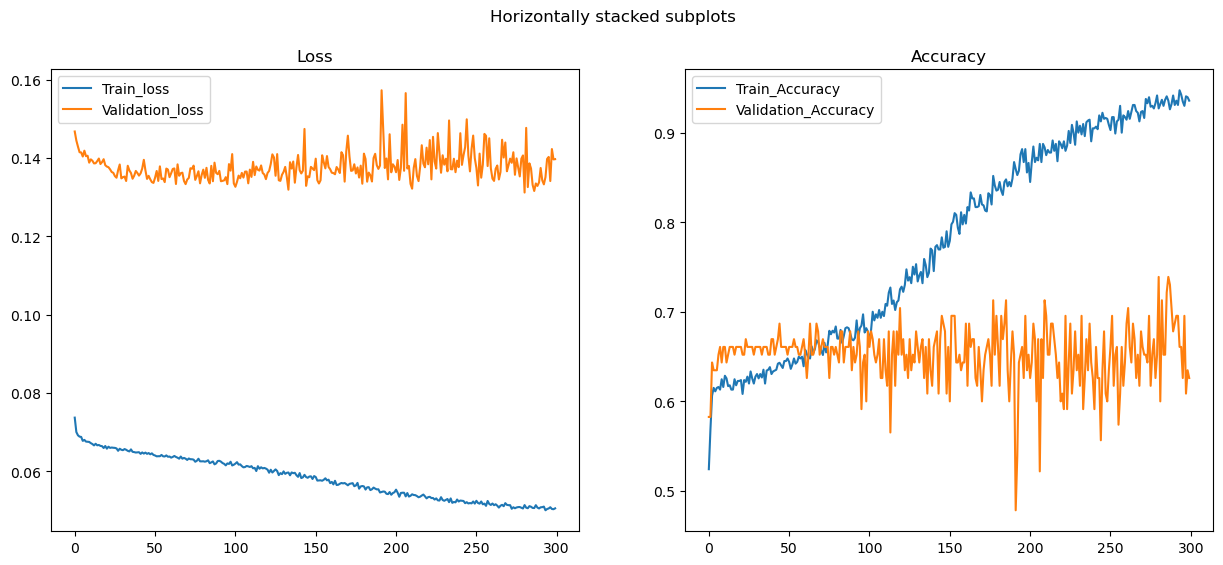

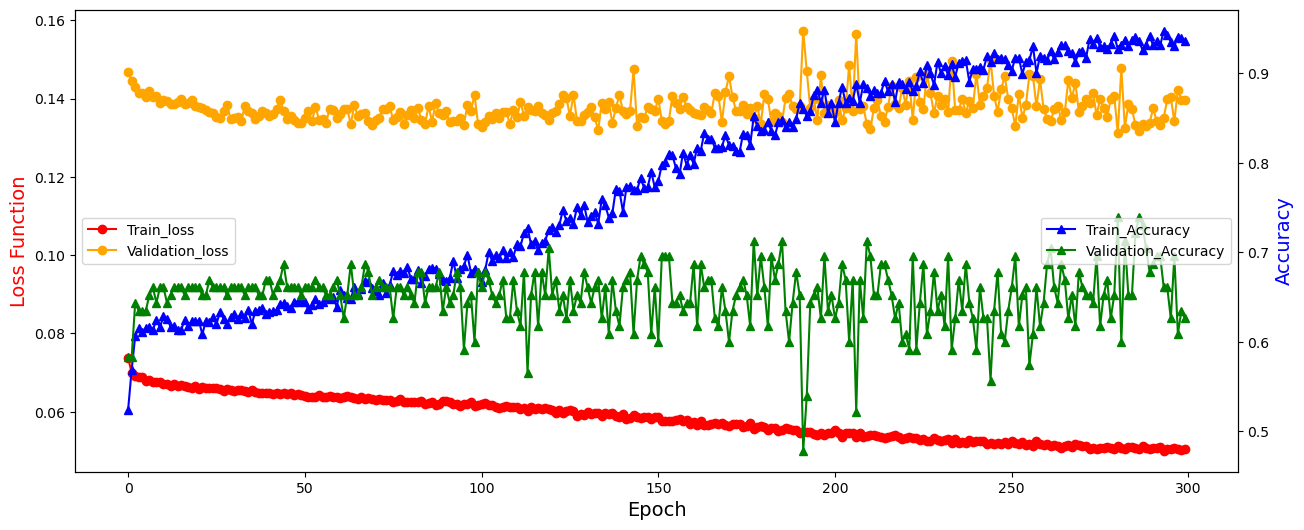

Current time: 237.849 minutes. Time expected till completion: 158.566 minutes

Epoch 301 of 500


100%|██████████| 15/15 [00:02<00:00,  5.98it/s]


train loss:  0.050298480796168346
Val loss:  0.13835060233655183
train accuracy:  0.9477756286266924
Val accuracy:  0.6695652173913044
Current time: 238.625 minutes. Time expected till completion: 157.762 minutes

Epoch 302 of 500


100%|██████████| 15/15 [00:02<00:00,  6.05it/s]


train loss:  0.05004256462220758
Val loss:  0.1417194293892902
train accuracy:  0.9458413926499033
Val accuracy:  0.6347826086956522
Current time: 239.414 minutes. Time expected till completion: 156.967 minutes

Epoch 303 of 500


100%|██████████| 15/15 [00:02<00:00,  5.91it/s]


train loss:  0.050092793929046545
Val loss:  0.14112352599268374
train accuracy:  0.9477756286266924
Val accuracy:  0.6347826086956522
Current time: 240.198 minutes. Time expected till completion: 156.168 minutes

Epoch 304 of 500


100%|██████████| 15/15 [00:02<00:00,  6.08it/s]


train loss:  0.05021758749360503
Val loss:  0.13964376916056093
train accuracy:  0.941972920696325
Val accuracy:  0.6782608695652174
Current time: 240.983 minutes. Time expected till completion: 155.371 minutes

Epoch 305 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.049953645387055566
Val loss:  0.1358591141908065
train accuracy:  0.9439071566731141
Val accuracy:  0.7130434782608696
Current time: 241.757 minutes. Time expected till completion: 154.566 minutes

Epoch 306 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.050531932187034265
Val loss:  0.13261771720388663
train accuracy:  0.9381044487427466
Val accuracy:  0.7043478260869566
Current time: 242.529 minutes. Time expected till completion: 153.760 minutes

Epoch 307 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.05043710096661772
Val loss:  0.1336022014203279
train accuracy:  0.9361702127659575
Val accuracy:  0.6956521739130435
Current time: 243.320 minutes. Time expected till completion: 152.967 minutes

Epoch 308 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.05002591388599093
Val loss:  0.13775196593740713
train accuracy:  0.9526112185686654
Val accuracy:  0.6782608695652174
Current time: 244.121 minutes. Time expected till completion: 152.180 minutes

Epoch 309 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.05045263662329034
Val loss:  0.1402676680813665
train accuracy:  0.9410058027079303
Val accuracy:  0.6434782608695652
Current time: 244.929 minutes. Time expected till completion: 151.396 minutes

Epoch 310 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.04984343870465483
Val loss:  0.1357303904450458
train accuracy:  0.9545454545454546
Val accuracy:  0.6956521739130435
Current time: 245.720 minutes. Time expected till completion: 150.602 minutes

Epoch 311 of 500


100%|██████████| 15/15 [00:02<00:00,  6.10it/s]


train loss:  0.04992036305267068
Val loss:  0.13985258703646453
train accuracy:  0.9468085106382979
Val accuracy:  0.6434782608695652
Current time: 246.524 minutes. Time expected till completion: 149.817 minutes

Epoch 312 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.04999271669286363
Val loss:  0.13627143424490223
train accuracy:  0.9526112185686654
Val accuracy:  0.6782608695652174
Current time: 247.321 minutes. Time expected till completion: 149.027 minutes

Epoch 313 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.049875502833084166
Val loss:  0.13712261759716532
train accuracy:  0.9477756286266924
Val accuracy:  0.6869565217391305
Current time: 248.119 minutes. Time expected till completion: 148.237 minutes

Epoch 314 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.05050851119325516
Val loss:  0.13657574446304985
train accuracy:  0.9352030947775629
Val accuracy:  0.6695652173913044
Current time: 248.926 minutes. Time expected till completion: 147.453 minutes

Epoch 315 of 500


100%|██████████| 15/15 [00:02<00:00,  6.04it/s]


train loss:  0.05018715154040943
Val loss:  0.13565712700719418
train accuracy:  0.9410058027079303
Val accuracy:  0.6956521739130435
Current time: 249.725 minutes. Time expected till completion: 146.664 minutes

Epoch 316 of 500


100%|██████████| 15/15 [00:02<00:00,  6.05it/s]


train loss:  0.04991688788283033
Val loss:  0.13439276218414306
train accuracy:  0.9497098646034816
Val accuracy:  0.7130434782608696
Current time: 250.534 minutes. Time expected till completion: 145.881 minutes

Epoch 317 of 500


100%|██████████| 15/15 [00:02<00:00,  6.02it/s]


train loss:  0.0506443299454001
Val loss:  0.13089630189149276
train accuracy:  0.9410058027079303
Val accuracy:  0.7043478260869566
Current time: 251.325 minutes. Time expected till completion: 145.087 minutes

Epoch 318 of 500


100%|██████████| 15/15 [00:02<00:00,  6.03it/s]


train loss:  0.05015918687418305
Val loss:  0.13649372380712757
train accuracy:  0.9458413926499033
Val accuracy:  0.6695652173913044
Current time: 252.155 minutes. Time expected till completion: 144.315 minutes

Epoch 319 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.04969598661308362
Val loss:  0.13736627827519957
train accuracy:  0.9526112185686654
Val accuracy:  0.6782608695652174
Current time: 252.951 minutes. Time expected till completion: 143.524 minutes

Epoch 320 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.04980384484942232
Val loss:  0.13833086749781734
train accuracy:  0.9506769825918762
Val accuracy:  0.6782608695652174
Current time: 253.736 minutes. Time expected till completion: 142.726 minutes

Epoch 321 of 500


100%|██████████| 15/15 [00:02<00:00,  5.89it/s]


train loss:  0.049477681661712826
Val loss:  0.13443627927614296
train accuracy:  0.9574468085106383
Val accuracy:  0.6956521739130435
Current time: 254.561 minutes. Time expected till completion: 141.951 minutes

Epoch 322 of 500


100%|██████████| 15/15 [00:02<00:00,  5.33it/s]


train loss:  0.04979924952730219
Val loss:  0.14251455224078635
train accuracy:  0.9516441005802708
Val accuracy:  0.6347826086956522
Current time: 255.405 minutes. Time expected till completion: 141.187 minutes

Epoch 323 of 500


100%|██████████| 15/15 [00:02<00:00,  6.01it/s]


train loss:  0.049920904221341045
Val loss:  0.13850205670232357
train accuracy:  0.9477756286266924
Val accuracy:  0.6695652173913044
Current time: 256.250 minutes. Time expected till completion: 140.422 minutes

Epoch 324 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.05005841824717863
Val loss:  0.14113837221394415
train accuracy:  0.9458413926499033
Val accuracy:  0.6521739130434783
Current time: 257.062 minutes. Time expected till completion: 139.639 minutes

Epoch 325 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.050130587136030656
Val loss:  0.13793250166851542
train accuracy:  0.9390715667311412
Val accuracy:  0.6434782608695652
Current time: 257.850 minutes. Time expected till completion: 138.842 minutes

Epoch 326 of 500


100%|██████████| 15/15 [00:02<00:00,  5.97it/s]


train loss:  0.0502561676663633
Val loss:  0.13956032473108043
train accuracy:  0.9439071566731141
Val accuracy:  0.6608695652173913
Current time: 258.670 minutes. Time expected till completion: 138.063 minutes

Epoch 327 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.049088863558649325
Val loss:  0.14177244694336602
train accuracy:  0.965183752417795
Val accuracy:  0.6347826086956522
Current time: 259.481 minutes. Time expected till completion: 137.279 minutes

Epoch 328 of 500


100%|██████████| 15/15 [00:02<00:00,  6.07it/s]


train loss:  0.04995094288709777
Val loss:  0.14358515480290288
train accuracy:  0.941972920696325
Val accuracy:  0.6
Current time: 260.305 minutes. Time expected till completion: 136.501 minutes

Epoch 329 of 500


100%|██████████| 15/15 [00:02<00:00,  5.96it/s]


train loss:  0.05014317028757682
Val loss:  0.135101666657821
train accuracy:  0.9390715667311412
Val accuracy:  0.6956521739130435
Current time: 261.131 minutes. Time expected till completion: 135.725 minutes

Epoch 330 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.049533973464191076
Val loss:  0.1404105808423913
train accuracy:  0.9555125725338491
Val accuracy:  0.6521739130434783
Current time: 261.931 minutes. Time expected till completion: 134.934 minutes

Epoch 331 of 500


100%|██████████| 15/15 [00:02<00:00,  5.99it/s]


train loss:  0.05060045441299158
Val loss:  0.13164987564086914
train accuracy:  0.9381044487427466
Val accuracy:  0.7217391304347827
Current time: 262.724 minutes. Time expected till completion: 134.140 minutes

Epoch 332 of 500


100%|██████████| 15/15 [00:02<00:00,  6.05it/s]


train loss:  0.04987497146401691
Val loss:  0.14245218867840975
train accuracy:  0.9477756286266924
Val accuracy:  0.6086956521739131
Current time: 263.515 minutes. Time expected till completion: 133.345 minutes

Epoch 333 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.04957133669917772
Val loss:  0.13747734038726142
train accuracy:  0.9545454545454546
Val accuracy:  0.6608695652173913
Current time: 264.349 minutes. Time expected till completion: 132.572 minutes

Epoch 334 of 500


100%|██████████| 15/15 [00:02<00:00,  6.00it/s]


train loss:  0.04984574368659486
Val loss:  0.1377674304920694
train accuracy:  0.9497098646034816
Val accuracy:  0.6956521739130435
Current time: 265.163 minutes. Time expected till completion: 131.788 minutes

Epoch 335 of 500


100%|██████████| 15/15 [00:02<00:00,  6.07it/s]


train loss:  0.049471042372963646
Val loss:  0.14029417348944623
train accuracy:  0.9564796905222437
Val accuracy:  0.6434782608695652
Current time: 265.993 minutes. Time expected till completion: 131.012 minutes

Epoch 336 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.050046878580429104
Val loss:  0.13989810062491376
train accuracy:  0.9477756286266924
Val accuracy:  0.6521739130434783
Current time: 266.816 minutes. Time expected till completion: 130.232 minutes

Epoch 337 of 500


100%|██████████| 15/15 [00:02<00:00,  5.66it/s]


train loss:  0.049518320039347016
Val loss:  0.13654585040133932
train accuracy:  0.9555125725338491
Val accuracy:  0.6695652173913044
Current time: 267.635 minutes. Time expected till completion: 129.449 minutes

Epoch 338 of 500


100%|██████████| 15/15 [00:02<00:00,  5.93it/s]


train loss:  0.05001694811381962
Val loss:  0.14393499467683876
train accuracy:  0.9516441005802708
Val accuracy:  0.6347826086956522
Current time: 268.457 minutes. Time expected till completion: 128.669 minutes

Epoch 339 of 500


100%|██████████| 15/15 [00:02<00:00,  5.89it/s]


train loss:  0.0501420182577646
Val loss:  0.13747874861178191
train accuracy:  0.9439071566731141
Val accuracy:  0.6869565217391305
Current time: 269.257 minutes. Time expected till completion: 127.877 minutes

Epoch 340 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.049774306251647624
Val loss:  0.13668378125066344
train accuracy:  0.9497098646034816
Val accuracy:  0.6782608695652174
Current time: 270.099 minutes. Time expected till completion: 127.106 minutes

Epoch 341 of 500


100%|██████████| 15/15 [00:02<00:00,  5.97it/s]


train loss:  0.050090436490407536
Val loss:  0.143775386913963
train accuracy:  0.9487427466150871
Val accuracy:  0.6173913043478261
Current time: 270.907 minutes. Time expected till completion: 126.317 minutes

Epoch 342 of 500


100%|██████████| 15/15 [00:02<00:00,  6.06it/s]


train loss:  0.04970383494227721
Val loss:  0.14285178288169528
train accuracy:  0.9526112185686654
Val accuracy:  0.6086956521739131
Current time: 271.745 minutes. Time expected till completion: 125.543 minutes

Epoch 343 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.049616178645386685
Val loss:  0.14499060848484868
train accuracy:  0.9574468085106383
Val accuracy:  0.6086956521739131
Current time: 272.566 minutes. Time expected till completion: 124.760 minutes

Epoch 344 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.049692821456569766
Val loss:  0.1362677973249684
train accuracy:  0.9526112185686654
Val accuracy:  0.6782608695652174
Current time: 273.358 minutes. Time expected till completion: 123.964 minutes

Epoch 345 of 500


100%|██████████| 15/15 [00:02<00:00,  5.99it/s]


train loss:  0.04960363803564695
Val loss:  0.13467582308727763
train accuracy:  0.9516441005802708
Val accuracy:  0.6869565217391305
Current time: 274.163 minutes. Time expected till completion: 123.175 minutes

Epoch 346 of 500


100%|██████████| 15/15 [00:02<00:00,  6.06it/s]


train loss:  0.04957088972198664
Val loss:  0.13950065063393635
train accuracy:  0.9535783365570599
Val accuracy:  0.6695652173913044
Current time: 274.957 minutes. Time expected till completion: 122.380 minutes

Epoch 347 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.050222476630884166
Val loss:  0.14295806055483612
train accuracy:  0.9390715667311412
Val accuracy:  0.6434782608695652
Current time: 275.775 minutes. Time expected till completion: 121.595 minutes

Epoch 348 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.04950342187567883
Val loss:  0.13747067866118057
train accuracy:  0.9535783365570599
Val accuracy:  0.6695652173913044
Current time: 276.586 minutes. Time expected till completion: 120.808 minutes

Epoch 349 of 500


100%|██████████| 15/15 [00:02<00:00,  5.96it/s]


train loss:  0.049865238267632936
Val loss:  0.139645995264468
train accuracy:  0.9497098646034816
Val accuracy:  0.6347826086956522
Current time: 277.415 minutes. Time expected till completion: 120.028 minutes

Epoch 350 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.04925456637340081
Val loss:  0.13899841878725136
train accuracy:  0.9622823984526112
Val accuracy:  0.6434782608695652
Current time: 278.220 minutes. Time expected till completion: 119.237 minutes

Epoch 351 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.04940209807233607
Val loss:  0.13415867919507235
train accuracy:  0.9593810444874274
Val accuracy:  0.7043478260869566
Current time: 279.028 minutes. Time expected till completion: 118.448 minutes

Epoch 352 of 500


100%|██████████| 15/15 [00:02<00:00,  6.01it/s]


train loss:  0.050144461529397874
Val loss:  0.13901852939439857
train accuracy:  0.941972920696325
Val accuracy:  0.6521739130434783
Current time: 279.835 minutes. Time expected till completion: 117.658 minutes

Epoch 353 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.050486312901720086
Val loss:  0.13488688831743986
train accuracy:  0.9332688588007737
Val accuracy:  0.6956521739130435
Current time: 280.635 minutes. Time expected till completion: 116.865 minutes

Epoch 354 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.04993937583910427
Val loss:  0.1357662278672923
train accuracy:  0.9468085106382979
Val accuracy:  0.7130434782608696
Current time: 281.428 minutes. Time expected till completion: 116.069 minutes

Epoch 355 of 500


100%|██████████| 15/15 [00:02<00:00,  6.01it/s]


train loss:  0.0495906503910714
Val loss:  0.13752267619837885
train accuracy:  0.9516441005802708
Val accuracy:  0.6695652173913044
Current time: 282.210 minutes. Time expected till completion: 115.269 minutes

Epoch 356 of 500


100%|██████████| 15/15 [00:02<00:00,  5.89it/s]


train loss:  0.04967116911821716
Val loss:  0.14178501937700355
train accuracy:  0.9506769825918762
Val accuracy:  0.6347826086956522
Current time: 282.998 minutes. Time expected till completion: 114.471 minutes

Epoch 357 of 500


100%|██████████| 15/15 [00:02<00:00,  6.10it/s]


train loss:  0.049712137223673514
Val loss:  0.13807508945465088
train accuracy:  0.9497098646034816
Val accuracy:  0.6608695652173913
Current time: 283.784 minutes. Time expected till completion: 113.673 minutes

Epoch 358 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.049118134166101425
Val loss:  0.13939282116682633
train accuracy:  0.9632495164410058
Val accuracy:  0.6434782608695652
Current time: 284.578 minutes. Time expected till completion: 112.877 minutes

Epoch 359 of 500


100%|██████████| 15/15 [00:02<00:00,  6.03it/s]


train loss:  0.0492514915461697
Val loss:  0.13406741670940234
train accuracy:  0.9564796905222437
Val accuracy:  0.7043478260869566
Current time: 285.363 minutes. Time expected till completion: 112.078 minutes

Epoch 360 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.04961377976019101
Val loss:  0.1421890305436176
train accuracy:  0.9535783365570599
Val accuracy:  0.6260869565217392
Current time: 286.143 minutes. Time expected till completion: 111.278 minutes

Epoch 361 of 500


100%|██████████| 15/15 [00:02<00:00,  6.03it/s]


train loss:  0.04974008004254944
Val loss:  0.1395253932994345
train accuracy:  0.9506769825918762
Val accuracy:  0.6695652173913044
Current time: 286.961 minutes. Time expected till completion: 110.492 minutes

Epoch 362 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.049759505392273806
Val loss:  0.14640354954678078
train accuracy:  0.9545454545454546
Val accuracy:  0.6
Current time: 287.740 minutes. Time expected till completion: 109.691 minutes

Epoch 363 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.04951418593266485
Val loss:  0.14130829158036606
train accuracy:  0.9535783365570599
Val accuracy:  0.6434782608695652
Current time: 288.515 minutes. Time expected till completion: 108.889 minutes

Epoch 364 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.049425749875590695
Val loss:  0.13594165677609651
train accuracy:  0.9545454545454546
Val accuracy:  0.6956521739130435
Current time: 289.306 minutes. Time expected till completion: 108.092 minutes

Epoch 365 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.04931679523659859
Val loss:  0.14098224432572073
train accuracy:  0.960348162475822
Val accuracy:  0.6434782608695652
Current time: 290.090 minutes. Time expected till completion: 107.293 minutes

Epoch 366 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.049131397525392605
Val loss:  0.1375166151834571
train accuracy:  0.9642166344294004
Val accuracy:  0.6521739130434783
Current time: 290.871 minutes. Time expected till completion: 106.494 minutes

Epoch 367 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.049368484972523996
Val loss:  0.13478391947953597
train accuracy:  0.9593810444874274
Val accuracy:  0.7043478260869566
Current time: 291.649 minutes. Time expected till completion: 105.693 minutes

Epoch 368 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.04957860961873481
Val loss:  0.13630588261977486
train accuracy:  0.9535783365570599
Val accuracy:  0.6869565217391305
Current time: 292.430 minutes. Time expected till completion: 104.893 minutes

Epoch 369 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.04953438222293005
Val loss:  0.14828377443811167
train accuracy:  0.9564796905222437
Val accuracy:  0.5739130434782609
Current time: 293.214 minutes. Time expected till completion: 104.095 minutes

Epoch 370 of 500


100%|██████████| 15/15 [00:02<00:00,  5.88it/s]


train loss:  0.04982396660505918
Val loss:  0.13619195948476376
train accuracy:  0.9477756286266924
Val accuracy:  0.6956521739130435
Current time: 294.020 minutes. Time expected till completion: 103.304 minutes

Epoch 371 of 500


100%|██████████| 15/15 [00:02<00:00,  6.00it/s]


train loss:  0.049723346240285286
Val loss:  0.1483943617862204
train accuracy:  0.9506769825918762
Val accuracy:  0.5826086956521739
Current time: 294.817 minutes. Time expected till completion: 102.511 minutes

Epoch 372 of 500


100%|██████████| 15/15 [00:02<00:00,  6.02it/s]


train loss:  0.04957316945553748
Val loss:  0.13654188850651616
train accuracy:  0.9535783365570599
Val accuracy:  0.6782608695652174
Current time: 295.601 minutes. Time expected till completion: 101.712 minutes

Epoch 373 of 500


100%|██████████| 15/15 [00:02<00:00,  6.04it/s]


train loss:  0.04940298245769405
Val loss:  0.13565885968830274
train accuracy:  0.9555125725338491
Val accuracy:  0.6869565217391305
Current time: 296.386 minutes. Time expected till completion: 100.914 minutes

Epoch 374 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.04913001704953856
Val loss:  0.13365780581598696
train accuracy:  0.9613152804642167
Val accuracy:  0.7043478260869566
Current time: 297.179 minutes. Time expected till completion: 100.119 minutes

Epoch 375 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.04904135104765975
Val loss:  0.13552036648211271
train accuracy:  0.9642166344294004
Val accuracy:  0.6956521739130435
Current time: 297.964 minutes. Time expected till completion: 99.321 minutes

Epoch 376 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.049028994497524236
Val loss:  0.14268202263375987
train accuracy:  0.9613152804642167
Val accuracy:  0.6173913043478261
Current time: 298.745 minutes. Time expected till completion: 98.522 minutes

Epoch 377 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.04880188396867055
Val loss:  0.14499455016592275
train accuracy:  0.9680851063829787
Val accuracy:  0.591304347826087
Current time: 299.527 minutes. Time expected till completion: 97.724 minutes

Epoch 378 of 500


100%|██████████| 15/15 [00:02<00:00,  6.05it/s]


train loss:  0.049023379786102175
Val loss:  0.1346740230270054
train accuracy:  0.9632495164410058
Val accuracy:  0.6869565217391305
Current time: 300.307 minutes. Time expected till completion: 96.925 minutes

Epoch 379 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.049604853128787395
Val loss:  0.13193430848743604
train accuracy:  0.9535783365570599
Val accuracy:  0.7217391304347827
Current time: 301.098 minutes. Time expected till completion: 96.129 minutes

Epoch 380 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.0494002206413151
Val loss:  0.13327510616053706
train accuracy:  0.9574468085106383
Val accuracy:  0.7130434782608696
Current time: 301.880 minutes. Time expected till completion: 95.330 minutes

Epoch 381 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.04965268366572013
Val loss:  0.1363137836041658
train accuracy:  0.9506769825918762
Val accuracy:  0.6782608695652174
Current time: 302.660 minutes. Time expected till completion: 94.532 minutes

Epoch 382 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.04914629505496883
Val loss:  0.13760400492212047
train accuracy:  0.960348162475822
Val accuracy:  0.6869565217391305
Current time: 303.462 minutes. Time expected till completion: 93.740 minutes

Epoch 383 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.04927138168530492
Val loss:  0.13915041581444118
train accuracy:  0.960348162475822
Val accuracy:  0.6521739130434783
Current time: 304.267 minutes. Time expected till completion: 92.949 minutes

Epoch 384 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.04919383512013655
Val loss:  0.14084460320680037
train accuracy:  0.9613152804642167
Val accuracy:  0.6521739130434783
Current time: 305.048 minutes. Time expected till completion: 92.150 minutes

Epoch 385 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.048877951370217124
Val loss:  0.1348990974218949
train accuracy:  0.9671179883945842
Val accuracy:  0.7043478260869566
Current time: 305.843 minutes. Time expected till completion: 91.356 minutes

Epoch 386 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.04899066715452611
Val loss:  0.1380224259003349
train accuracy:  0.965183752417795
Val accuracy:  0.7043478260869566
Current time: 306.635 minutes. Time expected till completion: 90.561 minutes

Epoch 387 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.04950811190808073
Val loss:  0.13610362384630287
train accuracy:  0.9526112185686654
Val accuracy:  0.6956521739130435
Current time: 307.424 minutes. Time expected till completion: 89.765 minutes

Epoch 388 of 500


100%|██████████| 15/15 [00:02<00:00,  6.04it/s]


train loss:  0.049096558783455556
Val loss:  0.13491128320279328
train accuracy:  0.9632495164410058
Val accuracy:  0.6782608695652174
Current time: 308.210 minutes. Time expected till completion: 88.968 minutes

Epoch 389 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.04903614353856911
Val loss:  0.13189789834229843
train accuracy:  0.9613152804642167
Val accuracy:  0.7304347826086957
Current time: 309.004 minutes. Time expected till completion: 88.173 minutes

Epoch 390 of 500


100%|██████████| 15/15 [00:02<00:00,  6.06it/s]


train loss:  0.04883944555915301
Val loss:  0.13354159489921902
train accuracy:  0.9642166344294004
Val accuracy:  0.7130434782608696
Current time: 309.792 minutes. Time expected till completion: 87.377 minutes

Epoch 391 of 500


100%|██████████| 15/15 [00:02<00:00,  6.07it/s]


train loss:  0.04924402107814294
Val loss:  0.13880945547767307
train accuracy:  0.9613152804642167
Val accuracy:  0.6869565217391305
Current time: 310.587 minutes. Time expected till completion: 86.583 minutes

Epoch 392 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.048826805512264114
Val loss:  0.13695444490598596
train accuracy:  0.9680851063829787
Val accuracy:  0.6782608695652174
Current time: 311.372 minutes. Time expected till completion: 85.786 minutes

Epoch 393 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.049453887937147334
Val loss:  0.14190628321274468
train accuracy:  0.9555125725338491
Val accuracy:  0.6347826086956522
Current time: 312.157 minutes. Time expected till completion: 84.989 minutes

Epoch 394 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.04913262852847691
Val loss:  0.13840478710506274
train accuracy:  0.9622823984526112
Val accuracy:  0.6434782608695652
Current time: 312.945 minutes. Time expected till completion: 84.193 minutes

Epoch 395 of 500


100%|██████████| 15/15 [00:02<00:00,  5.77it/s]


train loss:  0.04936927487817908
Val loss:  0.14045046049615612
train accuracy:  0.9574468085106383
Val accuracy:  0.6260869565217392
Current time: 313.743 minutes. Time expected till completion: 83.400 minutes

Epoch 396 of 500


100%|██████████| 15/15 [00:02<00:00,  6.00it/s]


train loss:  0.049265647591659134
Val loss:  0.13313930967579718
train accuracy:  0.9574468085106383
Val accuracy:  0.7217391304347827
Current time: 314.534 minutes. Time expected till completion: 82.605 minutes

Epoch 397 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.04976095919221697
Val loss:  0.13174500050752058
train accuracy:  0.9516441005802708
Val accuracy:  0.7130434782608696
Current time: 315.350 minutes. Time expected till completion: 81.816 minutes

Epoch 398 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.04938599888084013
Val loss:  0.13128689216530842
train accuracy:  0.960348162475822
Val accuracy:  0.7478260869565218
Current time: 316.136 minutes. Time expected till completion: 81.020 minutes

Epoch 399 of 500


100%|██████████| 15/15 [00:02<00:00,  6.06it/s]


train loss:  0.049071278689677755
Val loss:  0.13470437215722125
train accuracy:  0.9584139264990329
Val accuracy:  0.7130434782608696
Current time: 316.940 minutes. Time expected till completion: 80.228 minutes

Epoch 400 of 500


100%|██████████| 15/15 [00:02<00:00,  6.01it/s]


train loss:  0.049166813175728984
Val loss:  0.13590043264886606
train accuracy:  0.9632495164410058
Val accuracy:  0.6869565217391305
Saving model checkpoint


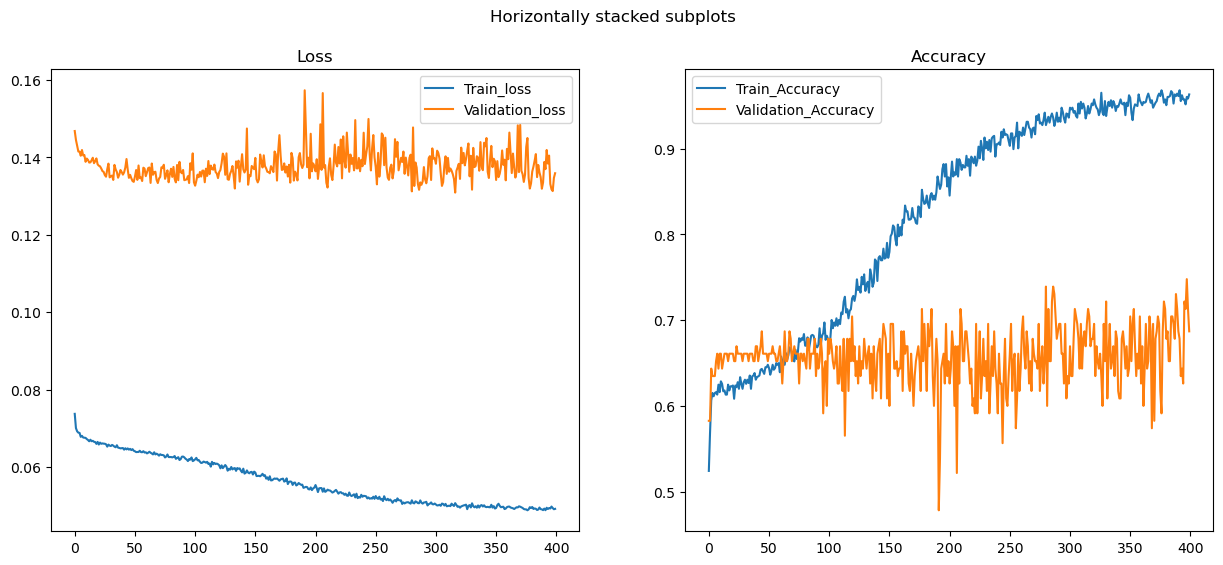

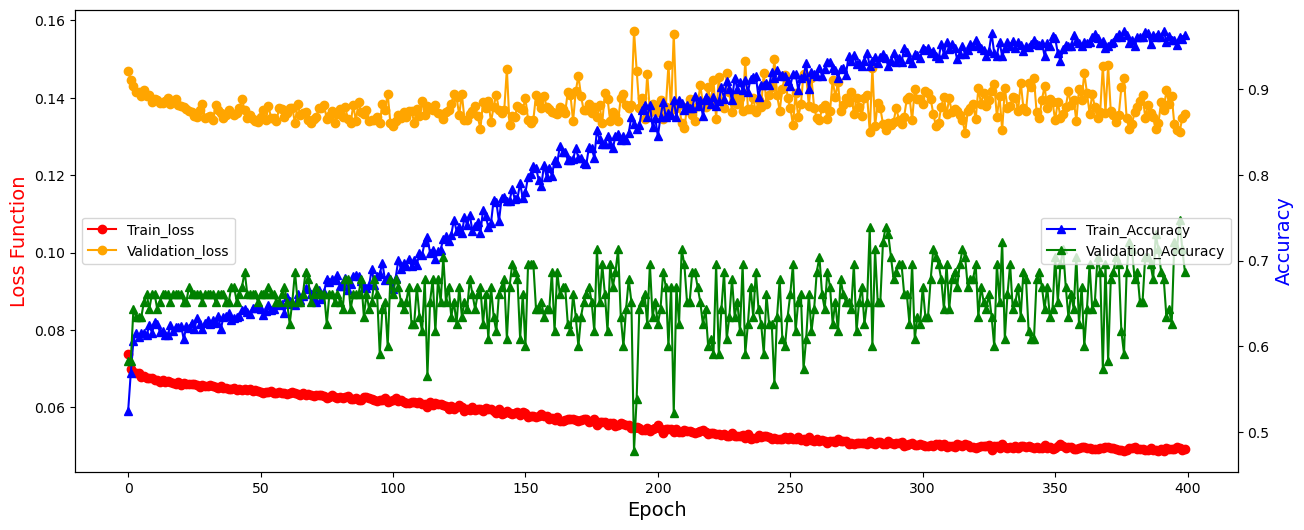

Current time: 317.755 minutes. Time expected till completion: 79.439 minutes

Epoch 401 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.0495335253341055
Val loss:  0.14424781799316405
train accuracy:  0.9535783365570599
Val accuracy:  0.6086956521739131
Current time: 318.548 minutes. Time expected till completion: 78.644 minutes

Epoch 402 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.04881820336301276
Val loss:  0.1333440625149271
train accuracy:  0.9680851063829787
Val accuracy:  0.7217391304347827
Current time: 319.357 minutes. Time expected till completion: 77.853 minutes

Epoch 403 of 500


100%|██████████| 15/15 [00:02<00:00,  6.02it/s]


train loss:  0.048670592690805405
Val loss:  0.13364274916441543
train accuracy:  0.9709864603481625
Val accuracy:  0.7130434782608696
Current time: 320.149 minutes. Time expected till completion: 77.058 minutes

Epoch 404 of 500


100%|██████████| 15/15 [00:02<00:00,  5.93it/s]


train loss:  0.04853091917831155
Val loss:  0.13300163694050002
train accuracy:  0.9709864603481625
Val accuracy:  0.6956521739130435
Current time: 320.940 minutes. Time expected till completion: 76.263 minutes

Epoch 405 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.048966406968852766
Val loss:  0.1412635124248007
train accuracy:  0.960348162475822
Val accuracy:  0.6347826086956522
Current time: 321.726 minutes. Time expected till completion: 75.467 minutes

Epoch 406 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.049310720289698885
Val loss:  0.13501223118408867
train accuracy:  0.9564796905222437
Val accuracy:  0.7130434782608696
Current time: 322.510 minutes. Time expected till completion: 74.670 minutes

Epoch 407 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.04868639835536595
Val loss:  0.1383021681205086
train accuracy:  0.9680851063829787
Val accuracy:  0.6608695652173913
Current time: 323.294 minutes. Time expected till completion: 73.873 minutes

Epoch 408 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.04933330739489838
Val loss:  0.13495009515596473
train accuracy:  0.9574468085106383
Val accuracy:  0.6782608695652174
Current time: 324.100 minutes. Time expected till completion: 73.081 minutes

Epoch 409 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.04961965197059587
Val loss:  0.13791543970937314
train accuracy:  0.9526112185686654
Val accuracy:  0.6956521739130435
Current time: 324.889 minutes. Time expected till completion: 72.286 minutes

Epoch 410 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.04963356671526999
Val loss:  0.13411019781361455
train accuracy:  0.9506769825918762
Val accuracy:  0.7130434782608696
Current time: 325.686 minutes. Time expected till completion: 71.492 minutes

Epoch 411 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.04898203491472875
Val loss:  0.1468865648559902
train accuracy:  0.9661508704061895
Val accuracy:  0.6173913043478261
Current time: 326.482 minutes. Time expected till completion: 70.698 minutes

Epoch 412 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.04976473059829476
Val loss:  0.13964676546013874
train accuracy:  0.9516441005802708
Val accuracy:  0.6782608695652174
Current time: 327.275 minutes. Time expected till completion: 69.903 minutes

Epoch 413 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.048993250848707426
Val loss:  0.13911400359609852
train accuracy:  0.9661508704061895
Val accuracy:  0.6521739130434783
Current time: 328.074 minutes. Time expected till completion: 69.110 minutes

Epoch 414 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.049049107145294694
Val loss:  0.13970611872880356
train accuracy:  0.9613152804642167
Val accuracy:  0.6521739130434783
Current time: 328.873 minutes. Time expected till completion: 68.317 minutes

Epoch 415 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.04896999915748316
Val loss:  0.13499286226604296
train accuracy:  0.9661508704061895
Val accuracy:  0.6956521739130435
Current time: 329.666 minutes. Time expected till completion: 67.522 minutes

Epoch 416 of 500


100%|██████████| 15/15 [00:02<00:00,  5.99it/s]


train loss:  0.04948344446243124
Val loss:  0.13812073676482492
train accuracy:  0.9555125725338491
Val accuracy:  0.6695652173913044
Current time: 330.459 minutes. Time expected till completion: 66.727 minutes

Epoch 417 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.0491795986026122
Val loss:  0.13783469873925913
train accuracy:  0.9555125725338491
Val accuracy:  0.6521739130434783
Current time: 331.250 minutes. Time expected till completion: 65.932 minutes

Epoch 418 of 500


100%|██████████| 15/15 [00:02<00:00,  6.06it/s]


train loss:  0.04900689800657202
Val loss:  0.1310141832932182
train accuracy:  0.9661508704061895
Val accuracy:  0.7391304347826086
Current time: 332.037 minutes. Time expected till completion: 65.136 minutes

Epoch 419 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.04873988983478952
Val loss:  0.1357646890308546
train accuracy:  0.9661508704061895
Val accuracy:  0.7043478260869566
Current time: 332.825 minutes. Time expected till completion: 64.341 minutes

Epoch 420 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.04921559110370319
Val loss:  0.1298030366068301
train accuracy:  0.9632495164410058
Val accuracy:  0.7565217391304347
Current time: 333.608 minutes. Time expected till completion: 63.544 minutes

Epoch 421 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.049133903629775204
Val loss:  0.13855312492536462
train accuracy:  0.960348162475822
Val accuracy:  0.6608695652173913
Current time: 334.401 minutes. Time expected till completion: 62.750 minutes

Epoch 422 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.04888741628805489
Val loss:  0.13772582023040109
train accuracy:  0.9661508704061895
Val accuracy:  0.6434782608695652
Current time: 335.185 minutes. Time expected till completion: 61.954 minutes

Epoch 423 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.04877852811342973
Val loss:  0.13309142589569092
train accuracy:  0.9661508704061895
Val accuracy:  0.7217391304347827
Current time: 335.985 minutes. Time expected till completion: 61.160 minutes

Epoch 424 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.04862485996067409
Val loss:  0.14445573350657587
train accuracy:  0.9709864603481625
Val accuracy:  0.6347826086956522
Current time: 336.776 minutes. Time expected till completion: 60.366 minutes

Epoch 425 of 500


100%|██████████| 15/15 [00:02<00:00,  6.22it/s]


train loss:  0.049851159869586936
Val loss:  0.13710048095039698
train accuracy:  0.9487427466150871
Val accuracy:  0.6869565217391305
Current time: 337.556 minutes. Time expected till completion: 59.569 minutes

Epoch 426 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.04889035547725006
Val loss:  0.13405898394791976
train accuracy:  0.9680851063829787
Val accuracy:  0.7043478260869566
Current time: 338.339 minutes. Time expected till completion: 58.773 minutes

Epoch 427 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.04858933530416433
Val loss:  0.13865219406459642
train accuracy:  0.9700193423597679
Val accuracy:  0.6434782608695652
Current time: 339.120 minutes. Time expected till completion: 57.976 minutes

Epoch 428 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.048989526596013994
Val loss:  0.1377977360849795
train accuracy:  0.9671179883945842
Val accuracy:  0.6782608695652174
Current time: 339.899 minutes. Time expected till completion: 57.179 minutes

Epoch 429 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.04877404508323227
Val loss:  0.13445439079533453
train accuracy:  0.9671179883945842
Val accuracy:  0.7217391304347827
Current time: 340.682 minutes. Time expected till completion: 56.383 minutes

Epoch 430 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.04869259424089694
Val loss:  0.13306958519894144
train accuracy:  0.9671179883945842
Val accuracy:  0.7130434782608696
Current time: 341.458 minutes. Time expected till completion: 55.586 minutes

Epoch 431 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.04865120296552057
Val loss:  0.13219935323881066
train accuracy:  0.9680851063829787
Val accuracy:  0.7130434782608696
Current time: 342.254 minutes. Time expected till completion: 54.792 minutes

Epoch 432 of 500


100%|██████████| 15/15 [00:02<00:00,  6.06it/s]


train loss:  0.04903031900035113
Val loss:  0.13356979100600533
train accuracy:  0.965183752417795
Val accuracy:  0.7217391304347827
Current time: 343.045 minutes. Time expected till completion: 53.998 minutes

Epoch 433 of 500


100%|██████████| 15/15 [00:02<00:00,  5.96it/s]


train loss:  0.0488408965345047
Val loss:  0.13337305680565212
train accuracy:  0.965183752417795
Val accuracy:  0.7130434782608696
Current time: 343.863 minutes. Time expected till completion: 53.207 minutes

Epoch 434 of 500


100%|██████████| 15/15 [00:02<00:00,  5.54it/s]


train loss:  0.048970632038909646
Val loss:  0.13102677801380988
train accuracy:  0.9642166344294004
Val accuracy:  0.7478260869565218
Current time: 344.727 minutes. Time expected till completion: 52.424 minutes

Epoch 435 of 500


100%|██████████| 15/15 [00:02<00:00,  6.01it/s]


train loss:  0.04859878563788689
Val loss:  0.13192624164664227
train accuracy:  0.9700193423597679
Val accuracy:  0.7217391304347827
Current time: 345.540 minutes. Time expected till completion: 51.632 minutes

Epoch 436 of 500


100%|██████████| 15/15 [00:02<00:00,  5.99it/s]


train loss:  0.048570768860829866
Val loss:  0.13469287727190102
train accuracy:  0.9709864603481625
Val accuracy:  0.6956521739130435
Current time: 346.334 minutes. Time expected till completion: 50.838 minutes

Epoch 437 of 500


100%|██████████| 15/15 [00:02<00:00,  5.80it/s]


train loss:  0.04880512711849618
Val loss:  0.135871756595114
train accuracy:  0.9661508704061895
Val accuracy:  0.6782608695652174
Current time: 347.126 minutes. Time expected till completion: 50.043 minutes

Epoch 438 of 500


100%|██████████| 15/15 [00:02<00:00,  6.03it/s]


train loss:  0.0491829719718697
Val loss:  0.13738078034442405
train accuracy:  0.9564796905222437
Val accuracy:  0.6695652173913044
Current time: 347.918 minutes. Time expected till completion: 49.249 minutes

Epoch 439 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.048842207721400306
Val loss:  0.13449676555135975
train accuracy:  0.965183752417795
Val accuracy:  0.6869565217391305
Current time: 348.700 minutes. Time expected till completion: 48.453 minutes

Epoch 440 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.048997996450623416
Val loss:  0.13867196311121402
train accuracy:  0.9632495164410058
Val accuracy:  0.6695652173913044
Current time: 349.478 minutes. Time expected till completion: 47.656 minutes

Epoch 441 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.04911310160874859
Val loss:  0.13539603222971378
train accuracy:  0.9622823984526112
Val accuracy:  0.6695652173913044
Current time: 350.253 minutes. Time expected till completion: 46.859 minutes

Epoch 442 of 500


100%|██████████| 15/15 [00:02<00:00,  6.06it/s]


train loss:  0.04903831720582752
Val loss:  0.14513111373652582
train accuracy:  0.9613152804642167
Val accuracy:  0.6173913043478261
Current time: 351.034 minutes. Time expected till completion: 46.063 minutes

Epoch 443 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.04861876639452847
Val loss:  0.13627575532249783
train accuracy:  0.9700193423597679
Val accuracy:  0.6695652173913044
Current time: 351.809 minutes. Time expected till completion: 45.267 minutes

Epoch 444 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.04871797942100687
Val loss:  0.13880019291587498
train accuracy:  0.9680851063829787
Val accuracy:  0.6608695652173913
Current time: 352.583 minutes. Time expected till completion: 44.470 minutes

Epoch 445 of 500


100%|██████████| 15/15 [00:02<00:00,  6.00it/s]


train loss:  0.049139760160815095
Val loss:  0.13535006564596425
train accuracy:  0.9593810444874274
Val accuracy:  0.7043478260869566
Current time: 353.371 minutes. Time expected till completion: 43.675 minutes

Epoch 446 of 500


100%|██████████| 15/15 [00:02<00:00,  5.97it/s]


train loss:  0.04875909573104903
Val loss:  0.13970700295075125
train accuracy:  0.9661508704061895
Val accuracy:  0.6347826086956522
Current time: 354.209 minutes. Time expected till completion: 42.886 minutes

Epoch 447 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.04887208065857509
Val loss:  0.13458754653516022
train accuracy:  0.965183752417795
Val accuracy:  0.6869565217391305
Current time: 354.999 minutes. Time expected till completion: 42.092 minutes

Epoch 448 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.04902979149348039
Val loss:  0.13408134501913319
train accuracy:  0.9642166344294004
Val accuracy:  0.7130434782608696
Current time: 355.784 minutes. Time expected till completion: 41.296 minutes

Epoch 449 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.048927470378765055
Val loss:  0.13415616439736408
train accuracy:  0.9613152804642167
Val accuracy:  0.7043478260869566
Current time: 356.577 minutes. Time expected till completion: 40.502 minutes

Epoch 450 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.04896685106380765
Val loss:  0.14291172960530157
train accuracy:  0.9632495164410058
Val accuracy:  0.6260869565217392
Current time: 357.377 minutes. Time expected till completion: 39.709 minutes

Epoch 451 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.048658771660157286
Val loss:  0.13731346337691597
train accuracy:  0.9680851063829787
Val accuracy:  0.6782608695652174
Current time: 358.171 minutes. Time expected till completion: 38.914 minutes

Epoch 452 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.04903700970819425
Val loss:  0.13066562880640445
train accuracy:  0.9613152804642167
Val accuracy:  0.7304347826086957
Current time: 358.961 minutes. Time expected till completion: 38.120 minutes

Epoch 453 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.048890208425558745
Val loss:  0.13734273081240447
train accuracy:  0.9642166344294004
Val accuracy:  0.6782608695652174
Current time: 359.746 minutes. Time expected till completion: 37.325 minutes

Epoch 454 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.04880241770117149
Val loss:  0.1334473729133606
train accuracy:  0.9661508704061895
Val accuracy:  0.7217391304347827
Current time: 360.540 minutes. Time expected till completion: 36.530 minutes

Epoch 455 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.0487721106415791
Val loss:  0.14184889482415242
train accuracy:  0.965183752417795
Val accuracy:  0.6347826086956522
Current time: 361.322 minutes. Time expected till completion: 35.735 minutes

Epoch 456 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.04876520670590133
Val loss:  0.13914649642032126
train accuracy:  0.9680851063829787
Val accuracy:  0.6608695652173913
Current time: 362.106 minutes. Time expected till completion: 34.940 minutes

Epoch 457 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.04915290223560665
Val loss:  0.13674005373664525
train accuracy:  0.9613152804642167
Val accuracy:  0.6956521739130435
Current time: 362.892 minutes. Time expected till completion: 34.145 minutes

Epoch 458 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.04876659156275441
Val loss:  0.13801194014756576
train accuracy:  0.9671179883945842
Val accuracy:  0.6608695652173913
Current time: 363.678 minutes. Time expected till completion: 33.350 minutes

Epoch 459 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.048479661489593685
Val loss:  0.13762720823287963
train accuracy:  0.9700193423597679
Val accuracy:  0.6782608695652174
Current time: 364.465 minutes. Time expected till completion: 32.556 minutes

Epoch 460 of 500


100%|██████████| 15/15 [00:02<00:00,  5.35it/s]


train loss:  0.048601625044064546
Val loss:  0.12988348940144415
train accuracy:  0.9700193423597679
Val accuracy:  0.7304347826086957
Current time: 365.251 minutes. Time expected till completion: 31.761 minutes

Epoch 461 of 500


100%|██████████| 15/15 [00:02<00:00,  6.08it/s]


train loss:  0.04855285074770797
Val loss:  0.1337182641029358
train accuracy:  0.9690522243713733
Val accuracy:  0.7043478260869566
Current time: 366.035 minutes. Time expected till completion: 30.966 minutes

Epoch 462 of 500


100%|██████████| 15/15 [00:02<00:00,  5.90it/s]


train loss:  0.04844836818641574
Val loss:  0.13452563337657764
train accuracy:  0.971953578336557
Val accuracy:  0.6782608695652174
Current time: 366.823 minutes. Time expected till completion: 30.172 minutes

Epoch 463 of 500


100%|██████████| 15/15 [00:02<00:00,  6.10it/s]


train loss:  0.04882246348106192
Val loss:  0.13688479558281277
train accuracy:  0.9671179883945842
Val accuracy:  0.6695652173913044
Current time: 367.612 minutes. Time expected till completion: 29.377 minutes

Epoch 464 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.04940506227934153
Val loss:  0.1343354432479195
train accuracy:  0.9555125725338491
Val accuracy:  0.6608695652173913
Current time: 368.404 minutes. Time expected till completion: 28.583 minutes

Epoch 465 of 500


100%|██████████| 15/15 [00:02<00:00,  6.10it/s]


train loss:  0.0483855129556453
Val loss:  0.13388787715331368
train accuracy:  0.9738878143133463
Val accuracy:  0.6956521739130435
Current time: 369.208 minutes. Time expected till completion: 27.790 minutes

Epoch 466 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.04857700521295721
Val loss:  0.13347566594248234
train accuracy:  0.9680851063829787
Val accuracy:  0.7130434782608696
Current time: 369.988 minutes. Time expected till completion: 26.995 minutes

Epoch 467 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.048802019087903964
Val loss:  0.13192644119262695
train accuracy:  0.9671179883945842
Val accuracy:  0.7217391304347827
Current time: 370.801 minutes. Time expected till completion: 26.202 minutes

Epoch 468 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.0486529316155085
Val loss:  0.13310021835824717
train accuracy:  0.9671179883945842
Val accuracy:  0.7130434782608696
Current time: 371.597 minutes. Time expected till completion: 25.408 minutes

Epoch 469 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.049019174430540956
Val loss:  0.13364197223082833
train accuracy:  0.9613152804642167
Val accuracy:  0.7304347826086957
Current time: 372.379 minutes. Time expected till completion: 24.614 minutes

Epoch 470 of 500


100%|██████████| 15/15 [00:02<00:00,  6.05it/s]


train loss:  0.048828575781742885
Val loss:  0.1346329144809557
train accuracy:  0.9642166344294004
Val accuracy:  0.6782608695652174
Current time: 373.168 minutes. Time expected till completion: 23.819 minutes

Epoch 471 of 500


100%|██████████| 15/15 [00:02<00:00,  6.19it/s]


train loss:  0.048260376462622816
Val loss:  0.1354095282761947
train accuracy:  0.9748549323017408
Val accuracy:  0.6956521739130435
Current time: 373.953 minutes. Time expected till completion: 23.025 minutes

Epoch 472 of 500


100%|██████████| 15/15 [00:02<00:00,  6.09it/s]


train loss:  0.04833556870196728
Val loss:  0.13691770252974136
train accuracy:  0.9748549323017408
Val accuracy:  0.6782608695652174
Current time: 374.745 minutes. Time expected till completion: 22.231 minutes

Epoch 473 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.04871106251526617
Val loss:  0.13348583242167597
train accuracy:  0.9690522243713733
Val accuracy:  0.7130434782608696
Current time: 375.540 minutes. Time expected till completion: 21.437 minutes

Epoch 474 of 500


100%|██████████| 15/15 [00:02<00:00,  6.17it/s]


train loss:  0.049012542405027025
Val loss:  0.13582239410151606
train accuracy:  0.9613152804642167
Val accuracy:  0.6782608695652174
Current time: 376.323 minutes. Time expected till completion: 20.642 minutes

Epoch 475 of 500


100%|██████████| 15/15 [00:02<00:00,  6.20it/s]


train loss:  0.04867061136769603
Val loss:  0.13568139179893163
train accuracy:  0.9700193423597679
Val accuracy:  0.6956521739130435
Current time: 377.114 minutes. Time expected till completion: 19.848 minutes

Epoch 476 of 500


100%|██████████| 15/15 [00:02<00:00,  6.11it/s]


train loss:  0.04857980991701093
Val loss:  0.1381963937178902
train accuracy:  0.9690522243713733
Val accuracy:  0.6521739130434783
Current time: 377.901 minutes. Time expected till completion: 19.054 minutes

Epoch 477 of 500


100%|██████████| 15/15 [00:02<00:00,  6.21it/s]


train loss:  0.048974692706213234
Val loss:  0.1395036889159161
train accuracy:  0.960348162475822
Val accuracy:  0.6695652173913044
Current time: 378.694 minutes. Time expected till completion: 18.260 minutes

Epoch 478 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.04858147579189426
Val loss:  0.13546819064928137
train accuracy:  0.9671179883945842
Val accuracy:  0.7130434782608696
Current time: 379.487 minutes. Time expected till completion: 17.466 minutes

Epoch 479 of 500


100%|██████████| 15/15 [00:02<00:00,  6.16it/s]


train loss:  0.04837880305210903
Val loss:  0.13026234118834787
train accuracy:  0.9748549323017408
Val accuracy:  0.7130434782608696
Current time: 380.273 minutes. Time expected till completion: 16.672 minutes

Epoch 480 of 500


100%|██████████| 15/15 [00:02<00:00,  6.18it/s]


train loss:  0.04855026030909393
Val loss:  0.132937753200531
train accuracy:  0.9709864603481625
Val accuracy:  0.6782608695652174
Current time: 381.058 minutes. Time expected till completion: 15.877 minutes

Epoch 481 of 500


100%|██████████| 15/15 [00:02<00:00,  5.98it/s]


train loss:  0.04837453676607438
Val loss:  0.13221569113109422
train accuracy:  0.9738878143133463
Val accuracy:  0.7304347826086957
Current time: 381.843 minutes. Time expected till completion: 15.083 minutes

Epoch 482 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.04858274484049652
Val loss:  0.1348738556322844
train accuracy:  0.9700193423597679
Val accuracy:  0.6782608695652174
Current time: 382.619 minutes. Time expected till completion: 14.289 minutes

Epoch 483 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.048731619430925674
Val loss:  0.13498245788657148
train accuracy:  0.9680851063829787
Val accuracy:  0.6782608695652174
Current time: 383.405 minutes. Time expected till completion: 13.495 minutes

Epoch 484 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.04874137810627773
Val loss:  0.1308601244636204
train accuracy:  0.9690522243713733
Val accuracy:  0.7391304347826086
Current time: 384.192 minutes. Time expected till completion: 12.701 minutes

Epoch 485 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.048759808277484294
Val loss:  0.13872239434200784
train accuracy:  0.9671179883945842
Val accuracy:  0.6434782608695652
Current time: 384.978 minutes. Time expected till completion: 11.907 minutes

Epoch 486 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.048491252921305496
Val loss:  0.12659723084905875
train accuracy:  0.971953578336557
Val accuracy:  0.7739130434782608
Current time: 385.773 minutes. Time expected till completion: 11.113 minutes

Epoch 487 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.0482736376890592
Val loss:  0.1386398662691531
train accuracy:  0.9748549323017408
Val accuracy:  0.6695652173913044
Current time: 386.560 minutes. Time expected till completion: 10.319 minutes

Epoch 488 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.0485439342617758
Val loss:  0.13503103359885837
train accuracy:  0.971953578336557
Val accuracy:  0.6782608695652174
Current time: 387.355 minutes. Time expected till completion: 9.525 minutes

Epoch 489 of 500


100%|██████████| 15/15 [00:02<00:00,  5.89it/s]


train loss:  0.04873081741987852
Val loss:  0.13275923521622368
train accuracy:  0.9671179883945842
Val accuracy:  0.6956521739130435
Current time: 388.145 minutes. Time expected till completion: 8.731 minutes

Epoch 490 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.04857164563708425
Val loss:  0.12938287983769955
train accuracy:  0.9700193423597679
Val accuracy:  0.7478260869565218
Current time: 388.935 minutes. Time expected till completion: 7.937 minutes

Epoch 491 of 500


100%|██████████| 15/15 [00:02<00:00,  6.08it/s]


train loss:  0.048592836068262216
Val loss:  0.13030591477518497
train accuracy:  0.9709864603481625
Val accuracy:  0.7304347826086957
Current time: 389.756 minutes. Time expected till completion: 7.144 minutes

Epoch 492 of 500


100%|██████████| 15/15 [00:02<00:00,  6.06it/s]


train loss:  0.048609173793626705
Val loss:  0.1376495096994483
train accuracy:  0.9690522243713733
Val accuracy:  0.6782608695652174
Current time: 390.537 minutes. Time expected till completion: 6.350 minutes

Epoch 493 of 500


100%|██████████| 15/15 [00:02<00:00,  6.15it/s]


train loss:  0.04857713618177049
Val loss:  0.1316922991172127
train accuracy:  0.9700193423597679
Val accuracy:  0.7217391304347827
Current time: 391.327 minutes. Time expected till completion: 5.556 minutes

Epoch 494 of 500


100%|██████████| 15/15 [00:02<00:00,  6.08it/s]


train loss:  0.04856495539039892
Val loss:  0.13470066371171371
train accuracy:  0.9700193423597679
Val accuracy:  0.7130434782608696
Current time: 392.108 minutes. Time expected till completion: 4.762 minutes

Epoch 495 of 500


100%|██████████| 15/15 [00:02<00:00,  6.07it/s]


train loss:  0.048762896017133614
Val loss:  0.13993164300918579
train accuracy:  0.9700193423597679
Val accuracy:  0.6521739130434783
Current time: 392.904 minutes. Time expected till completion: 3.969 minutes

Epoch 496 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.04890045886805256
Val loss:  0.132319568551105
train accuracy:  0.9642166344294004
Val accuracy:  0.7217391304347827
Current time: 393.704 minutes. Time expected till completion: 3.175 minutes

Epoch 497 of 500


100%|██████████| 15/15 [00:02<00:00,  6.14it/s]


train loss:  0.048217100492990224
Val loss:  0.13350745698680047
train accuracy:  0.97678916827853
Val accuracy:  0.7130434782608696
Current time: 394.494 minutes. Time expected till completion: 2.381 minutes

Epoch 498 of 500


100%|██████████| 15/15 [00:02<00:00,  6.08it/s]


train loss:  0.048401639586029936
Val loss:  0.13231487896131433
train accuracy:  0.9748549323017408
Val accuracy:  0.7130434782608696
Current time: 395.281 minutes. Time expected till completion: 1.587 minutes

Epoch 499 of 500


100%|██████████| 15/15 [00:02<00:00,  6.13it/s]


train loss:  0.048362347673862535
Val loss:  0.13798749084058015
train accuracy:  0.9729206963249516
Val accuracy:  0.7043478260869566
Current time: 396.078 minutes. Time expected till completion: 0.794 minutes

Epoch 500 of 500


100%|██████████| 15/15 [00:02<00:00,  6.12it/s]


train loss:  0.04874732110440385
Val loss:  0.13188856270002283
train accuracy:  0.9680851063829787
Val accuracy:  0.7391304347826086
Saving model checkpoint


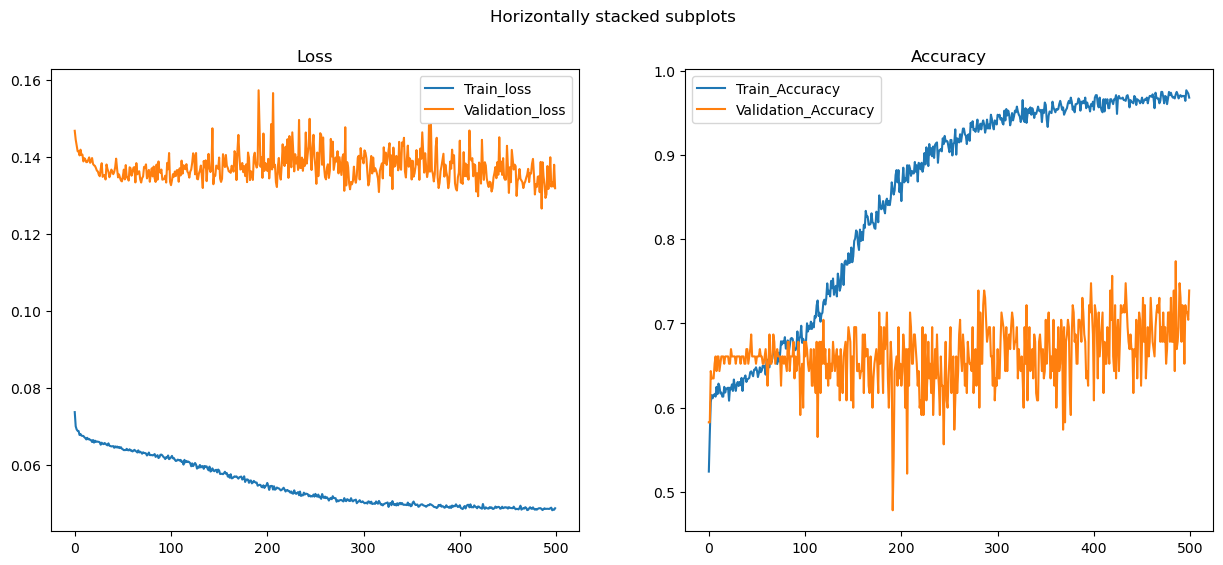

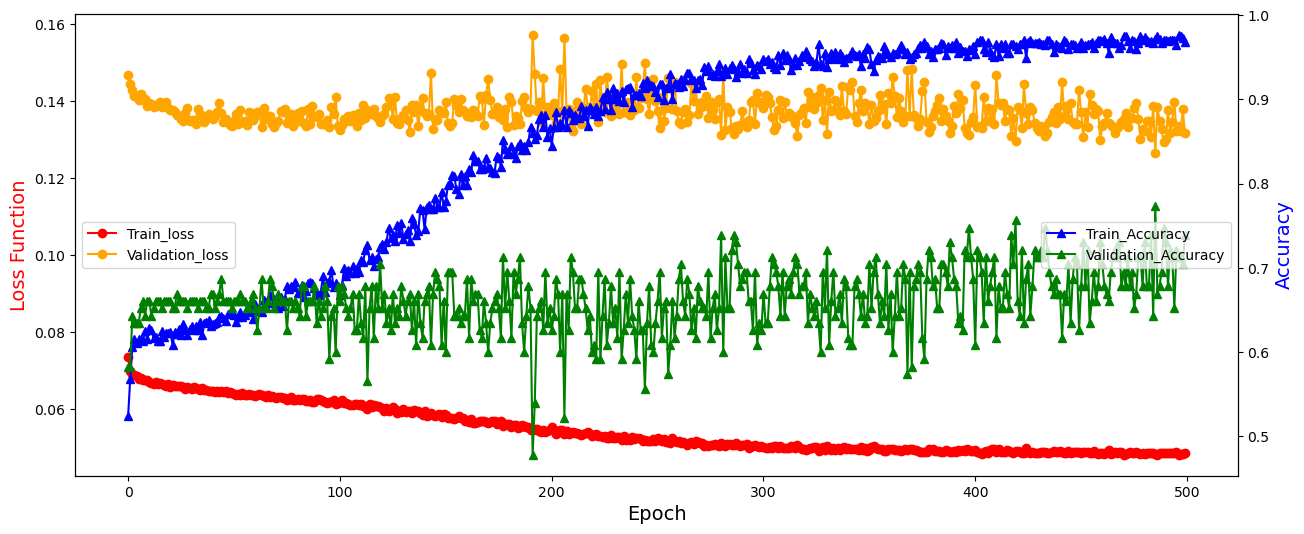

Current time: 397.176 minutes. Time expected till completion: 0.000 minutes
Finished training in: 397.178 minutes


In [14]:
#loader = train_loader # Use the train loader to train
#loader2 = valid_loader
# Main
train_loss, val_loss = [], []
train_accuracy, val_accuracy = [], []

val_loss_withDataAug, val_accuracy_withDataAug = [], []

# Load checkpoints
names = os.listdir(model_checkpoints)
for elem in names:
    if(elem=="metrics_losss_accuracy.csv"):
        print("Loading Metrics")
        dd = pd.read_csv(model_checkpoints + "metrics_losss_accuracy.csv")
        train_loss = dd["train_loss"].tolist()
        val_loss = dd["val_loss"].tolist()
        train_accuracy = dd["train_accuracy"].tolist()
        val_accuracy = dd["val_accuracy"].tolist()
        
# count time
start = time.time()
#PyTorch - Training the Model
for epoch in range(epoch_check, epochs):
    print()
    # Print current epoch
    print(f"Epoch {epoch + 1} of {epochs}")
    
    # Train model
    modelpy.train()
    running_loss=0
    total=0
    correct=0
    # loop for every training batch (one epoch)
    for bi, data in tqdm(enumerate(train_loader), total=len(train_loader)): # use tqdm package to track running time
        # Get the tensors
        images = data[0].to(device)# use the gpu
        labels = data[1].to(device)# use the gpu
        
        # in pytorch you have assign the zero for gradien in any sub epoch
        #optim.zero_grad()
        #create the output from the CNN base on the give batch images
        out = modelpy(images)
        # count the loss function 
        loss = criterion(out, labels)
        
        ######################
        optim.zero_grad()#################
        ######################
        # count the backpropagation
        loss.backward()
        # learning
        optim.step()
        
        # add new value to the main loss
        running_loss += loss.item()
        
        # calculate accuracy
        predictions = torch.argmax(out, dim=1)
        total += labels.size(0)
        correct +=(predictions == labels).sum().item()
        
        
    train_epoch_loss = running_loss/len(train_loader.dataset)
    
    train_epoch_accuracy = correct/total
    
    modelpy.eval()
    running_loss = 0.0
    correct=0
    total=0
    with torch.no_grad():
        for bi, data in tqdm(enumerate(valid_loader), total=len(valid_loader)):
            # Get the tensors
            images = data[0].to(device)# use the gpu
            label = data[1].to(device)# use the gpu
            
            #create the output from the CNN base on the give batch images
            outputs = modelpy(images)
            # count the loss function
            loss = criterion(outputs, label)
            
            # Add loss of each item (total items in a batch = batch size) .
            running_loss += loss.item()
            
            # calculate accuracy
            predictions = torch.argmax(outputs, dim=1)
            total += label.size(0)
            correct +=(predictions == label).sum().item()
            
            
    val_epoch_loss = running_loss/len(valid_loader.dataset) 
    val_epoch_accuracy = correct/total

    
    
    print("train loss: ", train_epoch_loss)
    print("Val loss: ", val_epoch_loss)
    print("train accuracy: ", train_epoch_accuracy)
    print("Val accuracy: ", val_epoch_accuracy)

    
    
    # save results
    train_loss.append(train_epoch_loss)
    val_loss.append(val_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    val_accuracy.append(val_epoch_accuracy)

    
    # Save model with all information every 100 epochs. Can be used 
    # resuming training. optim
    if (epoch+1) % checkpoints_save == 0: # checkpoints_save
        # Save Model
        print("Saving model checkpoint")
        end = time.time()
        time_elapsed = (end-start)+previous_time
        save_model(epoch, time_elapsed, modelpy, optim, criterion, path = model_checkpoints + "model_ckpt.pth")
        # save the metrics
        save_metrics(train_loss, val_loss, train_accuracy, val_accuracy, path = model_checkpoints + "metrics_losss_accuracy.csv")
        
        # save model at epoch
        save_model(epoch, time_elapsed, modelpy, optim, criterion, path = model_checkpoints + "model_ckpt_"+str(epoch+1)+".pth")
        
        # Cheack the evolution at this point
        plot_loss_accuracy(train_loss, val_loss, train_accuracy, val_accuracy)
        
        
    ep_time = time.time()
    print(f"Current time: {(((ep_time-start)+previous_time)/60):.3f} minutes. Time expected till completion: {(((((ep_time-start)+previous_time)/(epoch + 1)) * (epochs-(epoch + 1)))/60):.3f} minutes")
    
end = time.time()
print(f"Finished training in: {(((end-start)+previous_time)/60):.3f} minutes") 

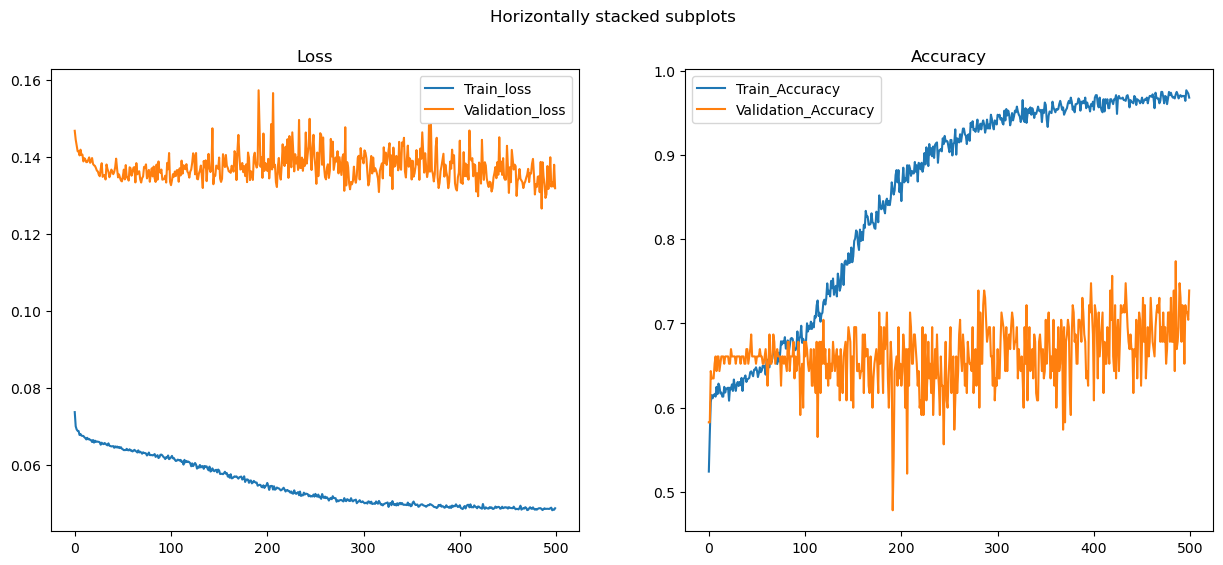

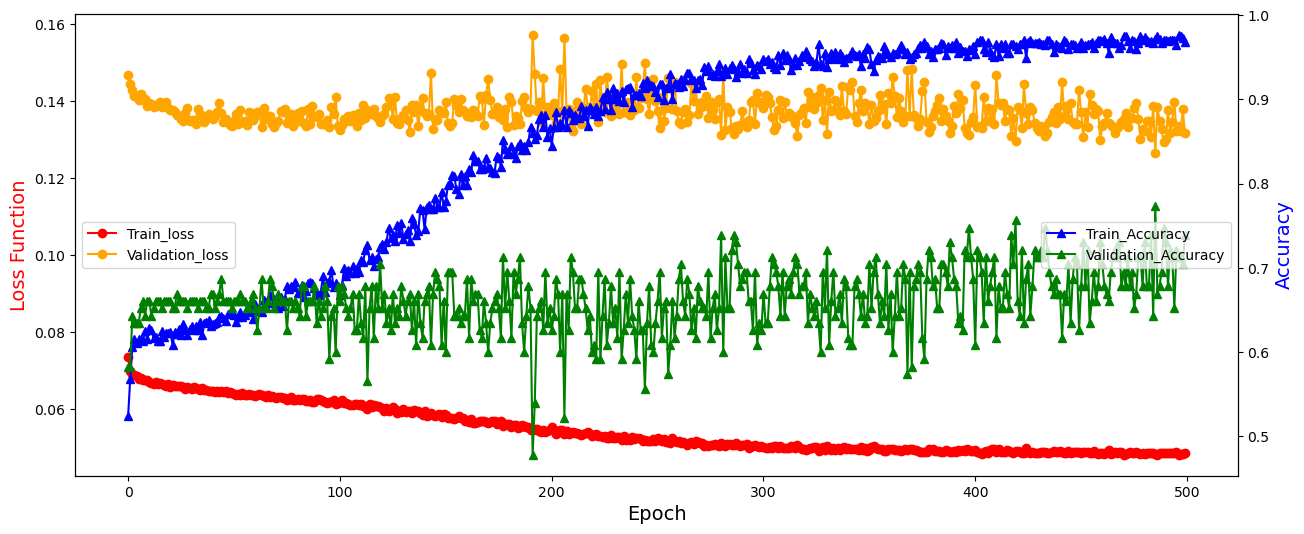

In [15]:
plot_loss_accuracy(train_loss, val_loss, train_accuracy, val_accuracy)

### Save Model

In [16]:
torch.save(modelpy.state_dict(), model_checkpoints + "saved_model_state_dict.pt")
torch.save(modelpy, model_checkpoints + "saved_model.pt")

# 3. Evaluate your model using the developed software

In [17]:
# Calculate accuracy for Validation and Train sets
accuracy_given_set(modelpy, train_loader, device, name="Train")
accuracy_given_set(modelpy, valid_loader, device, name="Validation")

Accuracy of the network on the 1034 Train instances: 97.678916827853%
Accuracy of the network on the 115 Validation instances: 73.91304347826087%


In [18]:
# Import the test dataset
size_of_resized_img = (224,224) 
test_data, test_names = import_test_folder_dataset_2(test_data_path, resized_side=size_of_resized_img)
print("Dim of Data: ", test_data.shape)
print("Dim of Lables: ", test_names.shape)

Dim of Data:  (380, 224, 224, 3)
Dim of Lables:  (380,)


In [19]:
# Create the dataset object
test_Dataset = Data_test_2(test_data, test_names, img_transform_val)#img_transform_val
print("Test len: ",len(test_Dataset))

Test len:  380


In [20]:
# Make the predictions for the test dataset
predictions_list, names = make_predictions(modelpy=modelpy, dataset=test_Dataset, device=device)
len(predictions_list)

380

In [21]:
# Save the Predictions
save_predictions_as_csv(names=names, predictions=predictions_list, name="13_18Conv_6Res_512FChannels_6Batch.csv")#Conv_Pred_5000Epochs_SGD_DEEP_Architecture_18Conv_4FFNN_HigherChannels.c

# 4. Compare results with [SCTL paper](https://www.mdpi.com/2076-2615/12/7/886/htm). Requirement: performance is better than VGG16: 66.8%

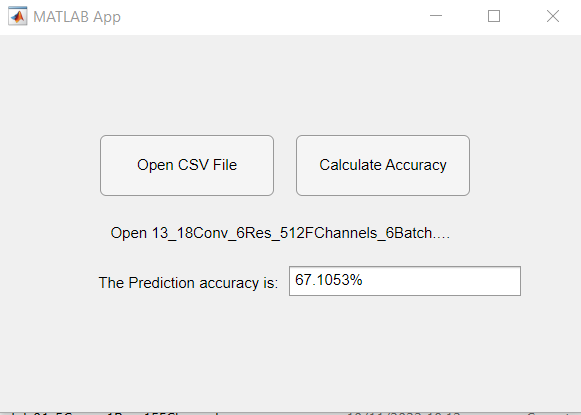

# 5. Write a four-page paper report using the shared LaTex template. Upload your paper to ResearchGate or Arxiv, and put your paper link here.

# 6. Grading rubric

(1). Code ------- 20 points (you also need to upload your final model as a pt file)

(2). Grammer ---- 20 points

(3). Introduction & related work --- 10 points

(4). Method  ---- 20 points

(5). Results ---- 20 points

(6). Discussion - 10 points